In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
np.random.seed(42)

### 使用 Batch Gradient Descent

In [2]:
n_samples = 500

area = np.random.uniform(10, 50, n_samples)
bedrooms = np.random.randint(1, 5, n_samples)
age = np.random.uniform(0, 30, n_samples)

noise = np.random.normal(0, 2, n_samples)
rent = 1.5 * area + 2 * bedrooms - 0.8 * age + 5 + noise

X = np.column_stack((area, bedrooms, age))           # 延著欄位方向合併
y = rent

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

w = np.random.rand(3)
b = np.random.rand()

learning_rate = 0.003
iterations = 5000
lambda_reg = 0.01
batch_size = 64

loss_history_train = []
loss_history_test = []


Iteration 0 : w = [0.9004 0.2188 0.515 ], b = 0.9871, Train_Loss = 2137.8867, Test_Loss = 1898.5443
Iteration 500 : w = [16.8232  2.1147 -6.4446], b = 40.9989, Train_Loss = 13.0400, Test_Loss = 7.0779
Iteration 1000 : w = [17.6422  2.1312 -6.9009], b = 42.9731, Train_Loss = 7.7245, Test_Loss = 3.9593
Iteration 1500 : w = [17.6855  2.1281 -6.9292], b = 43.0705, Train_Loss = 7.7109, Test_Loss = 4.0339
Iteration 2000 : w = [17.6878  2.1277 -6.9309], b = 43.0753, Train_Loss = 7.7108, Test_Loss = 4.0382
Iteration 2500 : w = [17.6879  2.1277 -6.931 ], b = 43.0755, Train_Loss = 7.7108, Test_Loss = 4.0385
Iteration 3000 : w = [17.6879  2.1277 -6.931 ], b = 43.0755, Train_Loss = 7.7108, Test_Loss = 4.0385
Iteration 3500 : w = [17.6879  2.1277 -6.931 ], b = 43.0755, Train_Loss = 7.7108, Test_Loss = 4.0385
Iteration 4000 : w = [17.6879  2.1277 -6.931 ], b = 43.0755, Train_Loss = 7.7108, Test_Loss = 4.0385
Iteration 4500 : w = [17.6879  2.1277 -6.931 ], b = 43.0755, Train_Loss = 7.7108, Test_Loss 

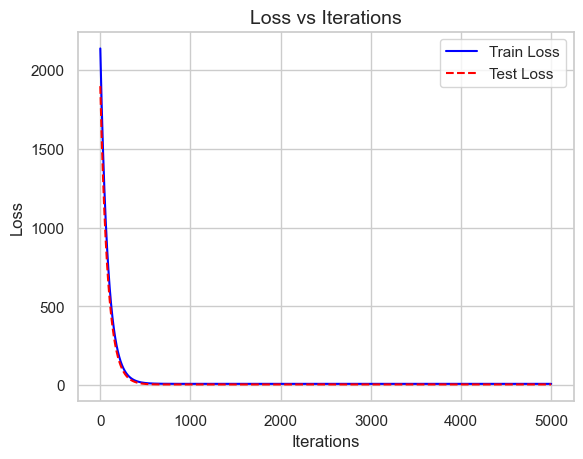

In [3]:
for i in range(iterations):
    y_pred_train = np.dot(X_train_standardized, w) + b
    error_train = y_train - y_pred_train

    w_gradient = (-2/len(X_train_standardized)) * np.dot(X_train_standardized.T, error_train) + 2 * lambda_reg * w
    b_gradient = (-2/len(X_train_standardized)) * np.sum(error_train)

    w -= learning_rate * w_gradient
    b -= learning_rate * b_gradient

    loss_train = np.mean(error_train ** 2) + lambda_reg * np.sum(w**2)

    loss_history_train.append(loss_train)

    # 驗證集損失
    y_pred_test = np.dot(X_test_standardized, w) + b
    error_test = y_test - y_pred_test
    loss_test = np.mean(error_test ** 2)
    loss_history_test.append(loss_test)

    if i % 500 == 0:
        print(f"Iteration {i} : w = {np.round(w, 4)}, b = {b:.4f}, Train_Loss = {loss_train:.4f}, Test_Loss = {loss_test:.4f}")

import seaborn as sns
sns.set(style = 'whitegrid')
plt.plot(loss_history_train, label = 'Train Loss', color = 'blue')
plt.plot(loss_history_test, label = 'Test Loss', color = 'red', linestyle = 'dashed')
plt.title('Loss vs Iterations', fontsize = 14)
plt.xlabel('Iterations', fontsize = 12)
plt.ylabel('Loss', fontsize = 12)
plt.grid(True)
plt.legend()
plt.show()

### 使用 Mini-Batch Gradient Descent

iteration 0: w = [1.0059 0.2156 0.204 ], b = 1.7881, Train_Loss = 2038.1715, Test_Loss = 1829.1501
iteration 500: w = [17.6702  2.1355 -6.9194], b = 43.0739, Train_Loss = 7.7113, Test_Loss = 4.0324
iteration 1000: w = [17.718   2.1246 -6.942 ], b = 43.0572, Train_Loss = 7.7122, Test_Loss = 4.0333
iteration 1500: w = [17.683   2.0986 -6.9412], b = 43.0772, Train_Loss = 7.7118, Test_Loss = 4.0415
iteration 2000: w = [17.7039  2.123  -6.9517], b = 43.0817, Train_Loss = 7.7116, Test_Loss = 4.0509
iteration 2500: w = [17.6919  2.1223 -6.9415], b = 43.0762, Train_Loss = 7.7110, Test_Loss = 4.0419
iteration 3000: w = [17.6945  2.1212 -6.9421], b = 43.0913, Train_Loss = 7.7113, Test_Loss = 4.0542
iteration 3500: w = [17.7114  2.1186 -6.9227], b = 43.0625, Train_Loss = 7.7117, Test_Loss = 4.0314
iteration 4000: w = [17.6779  2.115  -6.9398], b = 43.0722, Train_Loss = 7.7112, Test_Loss = 4.0362
iteration 4500: w = [17.7002  2.1123 -6.9331], b = 43.0611, Train_Loss = 7.7114, Test_Loss = 4.0302
it

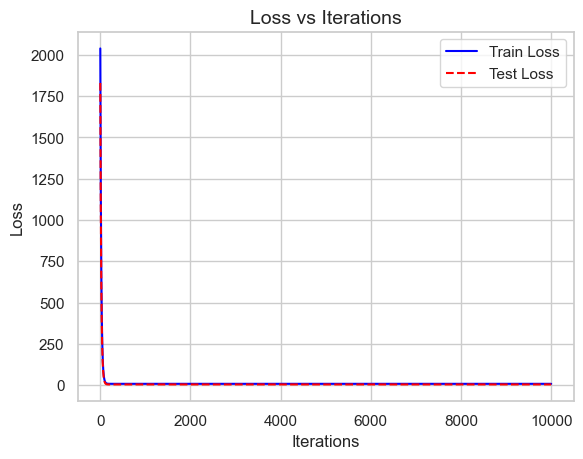

In [4]:
w = np.random.rand(3)
b = np.random.rand()

learning_rate = 0.003
iterations = 10000
lambda_reg = 0.01
batch_size = 128

loss_history_train2 = []
loss_history_test2 = []

for i in range(iterations):
    permutation = np.random.permutation(len(X_train_standardized))          # .permutation 隨機打亂順序
    X_shuffled = X_train_standardized[permutation]
    y_shuffled = y_train[permutation]

    for start_idx in range(0, len(X_train_standardized), batch_size):
        end_idx = start_idx + batch_size
        X_batch = X_shuffled[start_idx:end_idx]
        y_batch = y_shuffled[start_idx:end_idx]

        y_pred = np.dot(X_batch ,w) + b
        error = y_batch - y_pred

        w_gradient = (-2/len(X_batch)) * np.dot(X_batch.T ,error) + 2 * lambda_reg * w
        b_gradient = (-2/len(X_batch)) * np.sum(error)

        w -= learning_rate * w_gradient
        b -= learning_rate * b_gradient

    y_pred_train = np.dot(X_train_standardized, w) + b
    error_train = y_train - y_pred_train
    loss_train2 = np.mean(error_train ** 2) + lambda_reg * np.sum(w ** 2)
    loss_history_train2.append(loss_train2)

    y_pred_test = np.dot(X_test_standardized, w) + b
    error_test = y_test - y_pred_test
    loss_test2 = np.mean(error_test ** 2)
    loss_history_test2.append(loss_test2)

    if i % 500 == 0:
        print(f"iteration {i}: w = {np.round(w, 4)}, b = {b:.4f}, Train_Loss = {loss_train2:.4f}, Test_Loss = {loss_test2:.4f}")

import seaborn as sns
sns.set(style = 'whitegrid')
plt.plot(loss_history_train2, label = 'Train Loss', color = 'blue')
plt.plot(loss_history_test2, label = 'Test Loss', color = 'red', linestyle = 'dashed')
plt.title('Loss vs Iterations', fontsize = 14)
plt.xlabel('Iterations', fontsize = 12)
plt.ylabel('Loss', fontsize = 12)
plt.grid(True)
plt.legend()
plt.show()


### 使用三階段策略
<li>初期 : Mini-Batch + 固定學習率</li>
<li>中期 : Mini-Batch + 學習率衰退</li>
<li>後期 : Batch + 繼續衰退學習率</li>

iterations 0 : w = [0.1272 0.9896 0.9052], b = 0.3343, Train_Loss = 2174.0909, Test_Loss = 1979.4773
iterations 500 : w = [11.2464  1.9798 -3.7826], b = 27.4022, Train_Loss = 304.8829, Test_Loss = 263.3130
iterations 1000 : w = [15.3526  2.1741 -5.6926], b = 37.3201, Train_Loss = 45.9053, Test_Loss = 36.0490
iterations 1500 : w = [16.8959  2.1808 -6.4656], b = 40.9557, Train_Loss = 9.6853, Test_Loss = 7.1829
iterations 2000 : w = [17.4932  2.1752 -6.7852], b = 42.2980, Train_Loss = 5.4254, Test_Loss = 4.0313
iterations 2500 : w = [17.7091  2.1555 -6.9091], b = 42.7859, Train_Loss = 4.4724, Test_Loss = 3.9083
iterations 3000 : w = [17.7987  2.1422 -6.9659], b = 42.9610, Train_Loss = 4.7336, Test_Loss = 4.0065
iterations 3500 : w = [17.817   2.1424 -6.9821], b = 43.0050, Train_Loss = 4.0570, Test_Loss = 4.0424
iterations 4000 : w = [17.824   2.1428 -6.9864], b = 43.0186, Train_Loss = 4.5664, Test_Loss = 4.0547
iterations 4500 : w = [17.8276  2.1425 -6.9895], b = 43.0266, Train_Loss = 5.0

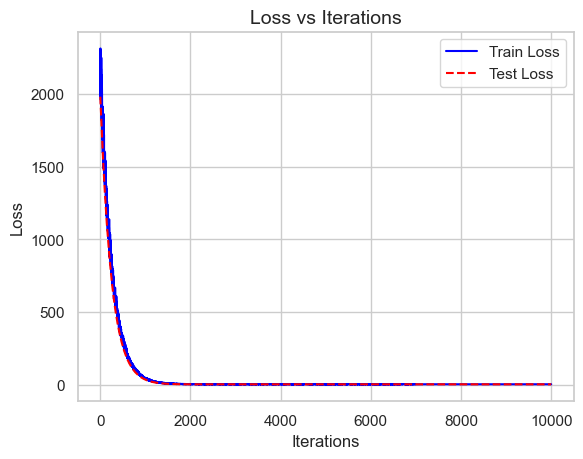

In [5]:
w = np.random.rand(3)
b = np.random.rand()

initial_lr = 0.001
iterations = 10000
lambda_reg = 0.001
batch_size = 256

early_stage = 3000
middle_stage = 7000
decay_rate = 0.005


loss_history_train3 = []
loss_history_test3 = []

for i in range(iterations):
    # 決定學習率與使用 Batch GD 或 Mini-Batch GD
    if i < 3000:
        learning_rate = initial_lr
        use_batch = False
    elif i < 7000:
        learning_rate = initial_lr / (1 + decay_rate * (i - early_stage))
        use_batch = False
    else:
        learning_rate = initial_lr / (1 + decay_rate * (middle_stage - early_stage))
        use_batch = True

    # 資料抽樣
    if use_batch:
        X_batch = X_train_standardized
        y_batch = y_train
    else:
        permutation = np.random.choice(len(X_train_standardized), size = batch_size)
        X_batch = X_train_standardized[permutation]
        y_batch = y_train[permutation]
    
    # 前向預測
    y_pred = np.dot(X_batch, w) + b
    error = y_batch - y_pred

    w_gradient = (-2/len(X_batch)) * np.dot(X_batch.T, error) + 2 * lambda_reg * w
    b_gradient = (-2/len(X_batch)) * np.sum(error)

    w -= learning_rate * w_gradient
    b -= learning_rate * b_gradient

    loss_train3 = np.mean(error ** 2) + lambda_reg * np.sum(w ** 2)
    loss_history_train3.append(loss_train3)

    y_pred_test = np.dot(X_test_standardized, w) + b
    error_test = y_test - y_pred_test
    loss_test3 = np.mean(error_test ** 2)
    loss_history_test3.append(loss_test3)

    if i % 500 == 0 or i == (iterations-1):
        print(f"iterations {i} : w = {np.round(w, 4)}, b = {b:.4f}, Train_Loss = {loss_train3:.4f}, Test_Loss = {loss_test3:.4f}")


sns.set(style = 'whitegrid')
plt.plot(loss_history_train3, label = 'Train Loss', color = 'blue')
plt.plot(loss_history_test3, label = 'Test Loss', color = 'red', linestyle = 'dashed')
plt.title('Loss vs Iterations', fontsize = 14)
plt.xlabel('Iterations', fontsize = 12)
plt.ylabel('Loss', fontsize = 12)
plt.grid(True)
plt.legend()
plt.show()

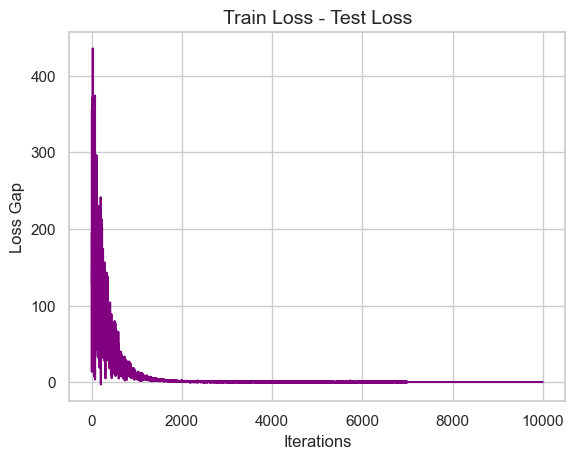

In [6]:
plt.plot(np.array(loss_history_train3) - np.array(loss_history_test3), color = 'purple')
plt.title('Train Loss - Test Loss', fontsize = 14)
plt.xlabel('Iterations', fontsize = 12)
plt.ylabel('Loss Gap', fontsize = 12)
plt.grid(True)
plt.show()

### 使用 sklearn.linear_model.Ridge 套件

In [7]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error


ridge_model = Ridge(alpha = 0.001, fit_intercept = True)
ridge_model.fit(X_train_standardized, y_train)

# 取得參數
w_ridge = ridge_model.coef_
b_ridge = ridge_model.intercept_

# 預測並計算 Loss
y_train_pred = ridge_model.predict(X_train_standardized)
y_test_pred = ridge_model.predict(X_test_standardized)

train_loss_ridge = mean_squared_error(y_train, y_train_pred)
test_loss_ridge = mean_squared_error(y_test, y_test_pred)

print(f"Ridge Regression 結果 : w = {np.round(w_ridge, 4)}, b = {b_ridge:.4f}, Train_Loss = {train_loss_ridge:.4f}, Test_Loss = {test_loss_ridge:.4f}")


Ridge Regression 結果 : w = [17.8684  2.1434 -7.0097], b = 43.0755, Train_Loss = 4.0188, Test_Loss = 4.1205


### 實驗 Ex1-9 / Ex1-10 / Ex1-11  Stochastic Gradient Descent

In [8]:
np.random.seed(42)
n_samples = 500
area = np.random.uniform(10, 50, n_samples)
expected_bedrooms = np.clip((area/15), 0, 4)
bedrooms = np.random.normal(expected_bedrooms, 0.5)
bedrooms = np.round(bedrooms).astype(int)
bedrooms = np.clip(bedrooms, 0, 4)
age = np.random.uniform(0, 30, n_samples)
noise = np.random.normal(0, 2, n_samples)
rent = 1.5 * area + 2 * bedrooms - 0.8 * age + 5 + noise

X = np.column_stack((area, bedrooms, age))
y = rent

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

w = np.random.rand(3)
b = np.random.rand()

learning_rate = 0.01
iterations = 10000
lambda_reg = 0.001

lr_history = []
w_history = []
b_history = []
loss_history_train_ex1_9 = []
loss_history_test_ex1_9 = []

loss_history_train_ex1_10 = []
loss_history_test_ex1_10 = []

loss_history_train_ex1_11 = []
loss_history_test_ex1_11 = []

for i in range(iterations):
    idx = np.random.randint(0, len(X_train_standardized))
    x_i = X_train_standardized[idx]
    y_i = y_train[idx]

    y_pred_i = np.dot(x_i, w) + b
    error_i = y_i - y_pred_i

    w_gradient = -2 * x_i * error_i + 2 * lambda_reg * w
    b_gradient = -2 * error_i

    lr_history.append(learning_rate)

    w -= learning_rate * w_gradient
    b -= learning_rate * b_gradient

    w_history.append(w.copy())                     # w 是為陣列為可變物件，所以要使用 Copy 將迭代的值記錄下來
    b_history.append(b)                            # b 是為浮點數為不可變物件，所以每次的值都會被留下來

    y_train_pred = np.dot(X_train_standardized, w) + b
    error_train = y_train - y_train_pred
    loss_train = np.mean(error_train ** 2) + lambda_reg * np.sum(w ** 2)
    loss_history_train_ex1_9.append(loss_train)

    y_test_pred = np.dot(X_test_standardized, w) + b
    error_test = y_test - y_test_pred
    loss_test = np.mean(error_test ** 2)
    loss_history_test_ex1_9.append(loss_test)

    if i % 50 == 0 or i == (iterations-1):
        print(f'iteration {i} : w = {np.round(w, 4)}, b = {b:.4f}, Train Loss = {loss_train:.4f}, Test Loss = {loss_test:.4f}')

# 找出最小 Test Loss 及對應的迭代次數
min_index = np.argmin(loss_history_test_ex1_9)
min_test_loss = loss_history_test_ex1_9[min_index]
best_w = w_history[min_index]
best_b = b_history[min_index]

summary_data = {
    'Final Train Loss' : [np.round(loss_history_train_ex1_9[iterations-1], 4)],
    'Final Test Loss' : [np.round(loss_history_test_ex1_9[iterations-1], 4)],
    'Best Iteration' : [min_index],
    'Train Loss @ Best Test' : [np.round(loss_history_train_ex1_9[min_index], 4)],
    'Best Test Loss' : [np.round(min_test_loss, 4)],
    'w (params)' : [np.round(best_w, 4)],
    'b (bias)' : [np.round(best_b, 4)]
}

df_summary = pd.DataFrame(summary_data)
display(df_summary)

from mpl_toolkits.mplot3d import Axes3D
# 範圍取自 w_history，讓曲面覆蓋你的優化軌跡
w1_vals = np.linspace(np.min([w[0] for w in w_history]) - 0.5, np.max([w[0] for w in w_history]) + 0.5, 600)
w3_vals = np.linspace(np.min([w[2] for w in w_history]) - 0.5, np.max([w[2] for w in w_history]) + 0.5, 600)
W1, W3 = np.meshgrid(w1_vals, w3_vals)

Loss_surface = np.zeros_like(W1)

fixed_w2 = best_w[1]
for i in range(W1.shape[0]):
    for j in range(W1.shape[1]):
        w_temp = np.array([W1[i, j], W3[i, j], fixed_w2])
        y_pred = np.dot(X_train_standardized, w_temp) + np.mean(b_history)
        loss = np.mean((y_train - y_pred) ** 2)
        Loss_surface[i, j] = loss

fig, ax = plt.subplots(subplot_kw = {'projection': '3d'}, figsize = (20,4))
surf = ax.plot_surface(W1, W3, Loss_surface, cmap = 'viridis', alpha = 0.7, linewidth = 0, antialiased = True, zorder = 1)

# 加入梯度下降行進軌跡
path_w1 = [w[0] for w in w_history]
path_w3 = [w[2] for w in w_history]

path_loss = []
for w1, w3 in zip(path_w1, path_w3):
    w_temp = np.array([w1, fixed_w2, w3])
    y_pred = np.dot(X_train_standardized, w_temp) + np.mean(b_history)
    loss = np.mean((y_train - y_pred) ** 2)
    path_loss.append(loss)

ax.plot(path_w1, path_w3, path_loss, color = "#003366", linewidth = 2, label = 'Ex1-9 : Fixed Learning Rate', zorder = 3)
ax.scatter(path_w1[0], path_w3[0], path_loss[0], color = '#2c3e50', s = 40, marker = 'o', label = 'Start', zorder = 4)
ax.scatter(best_w[0], best_w[2], min_test_loss, color = 'black', s = 50, marker = '*', label = 'Min Test Loss', zorder = 4)

ax.set_title('Loss Surface and Optimization Trajectory', fontsize = 14, fontweight = 'bold')
ax.set_xlabel('Weight w1 (area)')
ax.set_ylabel('Weight w3 (age)')
ax.set_zlabel('Loss')
ax.view_init(elev = 35, azim = -35)
# ax.view_init(elev = 30, azim = -45)
ax.legend(loc = 'upper right', fontsize = 8)

fig.colorbar(surf, shrink = 0.6, aspect = 13, label = 'Loss Value')
fig.subplots_adjust(right=0.85)
plt.tight_layout()
plt.show()



iteration 0 : w = [1.0278 0.2864 2.2895], b = 1.3118, Train Loss = 2126.0506, Test Loss = 1761.7464
iteration 50 : w = [ 9.7065  8.007  -7.0601], b = 28.5523, Train Loss = 224.2338, Test Loss = 210.6065
iteration 100 : w = [11.8818  7.827  -6.7919], b = 37.7485, Train Loss = 39.2326, Test Loss = 37.0766
iteration 150 : w = [12.8312  6.8309 -5.8104], b = 41.0363, Train Loss = 15.1941, Test Loss = 16.3625
iteration 200 : w = [12.9336  6.2861 -5.8514], b = 41.9159, Train Loss = 12.5447, Test Loss = 15.0859
iteration 250 : w = [14.5195  5.5697 -6.8567], b = 42.4947, Train Loss = 7.5815, Test Loss = 9.7191
iteration 300 : w = [15.1994  4.9728 -6.9969], b = 42.5183, Train Loss = 6.3352, Test Loss = 8.2942
iteration 350 : w = [15.3161  4.6567 -7.0717], b = 42.6370, Train Loss = 5.9843, Test Loss = 8.0444
iteration 400 : w = [16.1657  4.1854 -7.0216], b = 43.2946, Train Loss = 5.4741, Test Loss = 7.4943
iteration 450 : w = [16.3053  3.5497 -6.607 ], b = 42.8993, Train Loss = 4.6772, Test Loss 

,Final Train Loss,Final Test Loss,Best Iteration,Train Loss @ Best Test,Best Test Loss,w (params),b (bias)
0,3.9157,5.5231,7091,3.9821,5.497,"[18.1414, 2.1833, -6.9046]",42.5085


KeyboardInterrupt: 

### 實驗 Ex1-12 / Ex1-13 / Ex1-14  SGD + Inverse Time Decay

iteration 0 : w = [0.2288 0.2778 1.1033], b = 0.4294, Train Loss = 2210.9733, Test Loss = 1858.7296
iteration 50 : w = [ 1.9914  1.9699 -0.439 ], b = 4.6448, Train Loss = 1740.6553, Test Loss = 1478.6102
iteration 100 : w = [ 3.6434  3.2405 -0.9903], b = 8.3883, Train Loss = 1385.4175, Test Loss = 1176.9838
iteration 150 : w = [ 4.6209  3.9641 -0.8586], b = 11.4400, Train Loss = 1148.4555, Test Loss = 965.8784
iteration 200 : w = [ 5.2421  4.6905 -1.0815], b = 14.3121, Train Loss = 948.9237, Test Loss = 793.2570
iteration 250 : w = [ 7.1706  5.7579 -1.7377], b = 17.2258, Train Loss = 736.9340, Test Loss = 619.5600
iteration 300 : w = [ 8.1803  6.5944 -2.7594], b = 19.7332, Train Loss = 585.9071, Test Loss = 499.2802
iteration 350 : w = [ 8.49    7.0422 -2.9057], b = 21.7616, Train Loss = 489.5790, Test Loss = 415.0156
iteration 400 : w = [ 9.2481  7.2015 -3.2224], b = 23.8554, Train Loss = 396.1850, Test Loss = 335.7247
iteration 450 : w = [ 9.2976  6.9071 -3.374 ], b = 25.5568, Train 

,Final Train Loss,Final Test Loss,Best Iteration,Train Loss @ Best Test,Best Test Loss,w (params),b (bias),Learning Rate @ Test Loss
0,3.8917,5.5983,22603,3.8992,5.5557,"[17.8318, 2.3617, -6.8675]",42.669,0.0005


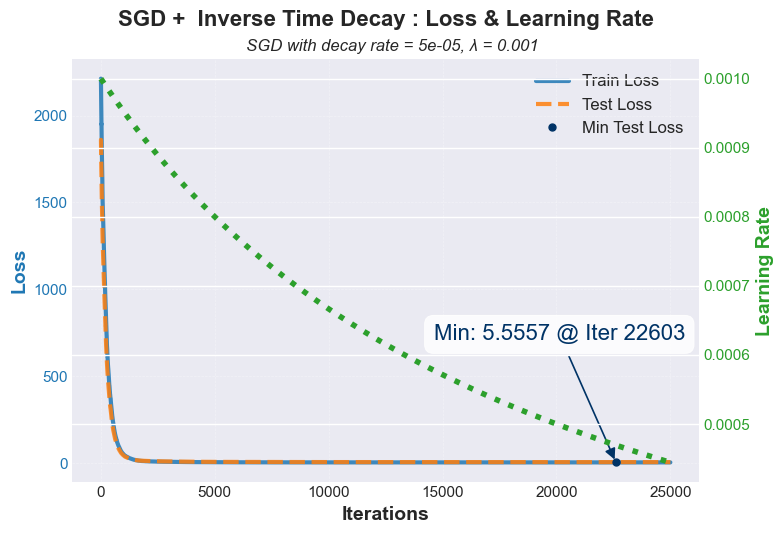

In [ ]:
np.random.seed(42)
n_samples = 500
area = np.random.uniform(10, 50, n_samples)
expected_bedrooms = np.clip((area/15), 0, 4)
bedrooms = np.random.normal(expected_bedrooms, 0.5)
bedrooms = np.round(bedrooms).astype(int)
bedrooms = np.clip(bedrooms, 0, 4)
age = np.random.uniform(0, 30, n_samples)
noise = np.random.normal(0, 2, n_samples)
rent = 1.5 * area + 2 * bedrooms - 0.8 * age + 5 + noise

X = np.column_stack((area, bedrooms, age))
y = rent

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

w = np.random.rand(3)
b = np.random.rand()

initial_lr = 0.001
iterations = 25000
lambda_reg = 0.001
decay_rate = 0.00005

w_history = []
b_history = []
loss_history_train_ex1_12 = []
loss_history_test_ex1_12 = []
lr_history_inverse_time = []

for i in range(iterations):
    idx = np.random.randint(0, len(X_train_standardized))
    x_i = X_train_standardized[idx]
    y_i = y_train[idx]

    y_pred_i = np.dot(x_i, w) + b
    error_i = y_i - y_pred_i

    w_gradient = (-2) * x_i * error_i + 2 * lambda_reg * w
    b_gradient = (-2) * error_i

    learning_rate = initial_lr / (1 + decay_rate * i)
    lr_history_inverse_time.append(learning_rate)

    w -= w_gradient * learning_rate
    b -= b_gradient * learning_rate

    w_history.append(w.copy())
    b_history.append(b)

    y_pred_train = np.dot(X_train_standardized, w) + b
    error_train = y_train - y_pred_train
    loss_train = np.mean(error_train ** 2) + lambda_reg * np.sum(w ** 2)
    loss_history_train_ex1_12.append(loss_train)

    y_pred_test = np.dot(X_test_standardized, w) + b
    error_test = y_test - y_pred_test
    loss_test = np.mean(error_test ** 2)
    loss_history_test_ex1_12.append(loss_test)

    if i % 50 == 0 or i == (iterations - 1):
        print(f'iteration {i} : w = {np.round(w, 4)}, b = {b:.4f}, Train Loss = {loss_train:.4f}, Test Loss = {loss_test:.4f}')


# 找出最小 Test Loss 及對應的迭代次數
min_index = np.argmin(loss_history_test_ex1_12)
min_test_loss = loss_history_test_ex1_12[min_index]
best_w = w_history[min_index]
best_b = b_history[min_index]
lr_at_test_loss = lr_history_inverse_time[min_index]


summary_data = {
    'Final Train Loss' : [np.round(loss_history_train_ex1_12[iterations-1], 4)],
    'Final Test Loss' : [np.round(loss_history_test_ex1_12[iterations-1], 4)],
    'Best Iteration' : [min_index],
    'Train Loss @ Best Test' : [np.round(loss_history_train_ex1_12[min_index], 4)],
    'Best Test Loss' : [np.round(loss_history_test_ex1_12[min_index], 4)],
    'w (params)' : [np.round(best_w, 4)],
    'b (bias)' : [np.round(best_b, 4)],
    'Learning Rate @ Test Loss' : [np.round(lr_at_test_loss, 4)]
}

df_summary = pd.DataFrame(summary_data)

display(df_summary)

# 設定圖案樣式
plt.style.use('seaborn-v0_8-darkgrid')

fig, ax1 = plt.subplots(figsize = (8, 5.5))
fig.text(0.5, 0.893, f'SGD with decay rate = {decay_rate}, λ = 0.001', ha = 'center', fontsize = 12, style = 'italic')


# 主軸 : 畫 Loss 曲線
color1 = '#1f77b4'       # 藍
color2 = '#ff7f0e'       # 橘
color3 = '#003366'
ax1.set_xlabel('Iterations', fontsize = 14, fontweight = 'bold')
ax1.set_ylabel('Loss', color = color1, fontsize = 14, fontweight = 'bold')
ax1.plot(loss_history_train_ex1_12, label = 'Train Loss', color = color1, linewidth = 3, alpha = 0.85, zorder = 3)
ax1.plot(loss_history_test_ex1_12, label = 'Test Loss', color = color2, linestyle = 'dashed', linewidth = 3, alpha = 0.85, zorder = 3)
ax1.tick_params(axis = 'y', labelcolor = color1)
ax1.plot(min_index, min_test_loss, 'o', markersize = 5, label = 'Min Test Loss', color = color3, zorder = 4)
bbox_props = dict(boxstyle = 'round,pad = 0.4', fc = 'white', lw = 0.8, alpha = 0.85)
ax1.annotate(f'Min: {min_test_loss:.4f} @ Iter {min_index}', xy = (min_index, min_test_loss), xytext = (min_index - 8000, min_test_loss + 700), textcoords = 'data', arrowprops = dict(arrowstyle = '-|>', color = color3, lw = 1.2, zorder = 4), fontsize = 16, color = color3, bbox = bbox_props, zorder = 4)
ax1.legend(loc = 'upper right', fontsize = 12, framealpha = 0.9)
ax1.set_title('SGD +  Inverse Time Decay : Loss & Learning Rate', fontsize = 16, fontweight = 'bold', pad = 24)
ax1.grid(True, linestyle = 'dashed', linewidth = 0.5, alpha = 0.4, zorder = 0)

# 副軸 : 畫 Learning Rate 曲線
ax2 = ax1.twinx()
color3 = '#2ca02c'      # 綠
ax2.set_ylabel('Learning Rate', color = color3, fontsize = 14, fontweight = 'bold')
ax2.plot(lr_history_inverse_time, label = 'Learning Rate', color = color3, linestyle = 'dotted', linewidth = 4)
ax2.tick_params(axis = 'y', labelcolor = color3)

# 自動調整佈局
fig.tight_layout()
#plt.savefig('ex1_12.png', dpi = 720, bbox_inches = 'tight')
plt.show()

iteration 0 : w = [0.5672 1.2174 0.7149], b = 0.7346, Train_Loss = 2137.4721, Test_Loss = 1804.9852
iteration 500 : w = [ 7.8802  6.5167 -1.4779], b = 21.4608, Train_Loss = 525.2978, Test_Loss = 431.1941
iteration 1000 : w = [ 9.9251  7.6195 -2.9073], b = 28.5678, Train_Loss = 236.9246, Test_Loss = 193.9832
iteration 1500 : w = [10.7232  7.7659 -3.9622], b = 32.0867, Train_Loss = 138.5861, Test_Loss = 114.6896
iteration 2000 : w = [11.3733  7.8658 -4.5471], b = 34.2494, Train_Loss = 92.0215, Test_Loss = 77.1721
iteration 2500 : w = [11.7592  7.8095 -4.8314], b = 35.6504, Train_Loss = 68.0506, Test_Loss = 57.6769
==> Saved model at iteration 2800: w = [11.86211084  7.76080072 -4.97705454], b = 36.28611557077089
iteration 3000 : w = [11.8925  7.6847 -5.0532], b = 36.6447, Train_Loss = 53.8284, Test_Loss = 46.1863
iteration 3500 : w = [12.0904  7.6332 -5.2777], b = 37.4059, Train_Loss = 43.9959, Test_Loss = 38.4032
iteration 4000 : w = [12.2377  7.533  -5.4287], b = 38.0175, Train_Loss = 

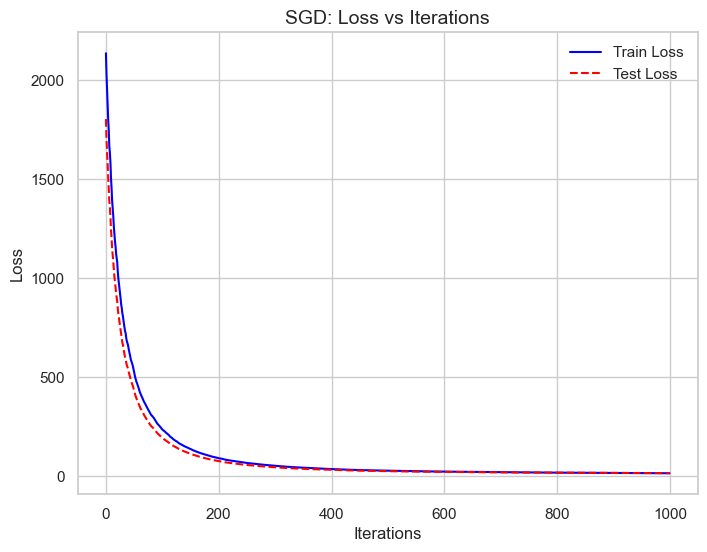

In [ ]:
np.random.seed(42)
w = np.random.rand(3)
b = np.random.rand()

initial_lr = 0.001
# learning_rate = 0.001
iterations = 10000
lambda_reg = 0.001
decay_rate = 0.002

loss_history_train4 = []
loss_history_test4 = []

w_at_2800 = None
b_at_2800 = None

for i in range(iterations):
    # 隨機抽一筆資料
    idx = np.random.randint(0, len(X_train_standardized))
    x_i = X_train_standardized[idx]
    y_i = y_train[idx]

    # 預測與誤差
    y_pred_i = np.dot(x_i, w) + b
    error_i = y_i - y_pred_i

    # 計算梯度
    w_gradient = -2 * x_i * error_i + 2 * lambda_reg * w
    b_gradient = -2 * error_i

    # 更新學習率(隨迭代次數遞減)
    learning_rate = initial_lr / (1 + decay_rate * i)

    # 更新參數
    w -= learning_rate * w_gradient
    b -= learning_rate * b_gradient

    # 每次記錄一次 Loss (可以改成每 10 次記錄一次)
    if i % 10 == 0:
        y_pred_train = np.dot(X_train_standardized, w) + b
        y_pred_test = np.dot(X_test_standardized, w) + b

        loss_train4 = np.mean((y_train - y_pred_train) ** 2) + lambda_reg * np.sum(w ** 2)
        loss_test4 = np.mean((y_test - y_pred_test) ** 2)

        loss_history_train4.append(loss_train4)
        loss_history_test4.append(loss_test4)

    # 每 500 次印出結果
    if i % 500 == 0 or i == (iterations-1):
        print(f"iteration {i} : w = {np.round(w, 4)}, b = {np.round(b, 4)}, Train_Loss = {loss_train4:.4f}, Test_Loss = {loss_test4:.4f}")

    if i == 2800:
        w_at_2800 = w.copy()
        b_at_2800 = b
        print(f"==> Saved model at iteration {i}: w = {w_at_2800}, b = {b_at_2800}")
    

sns.set(style = 'whitegrid')
plt.figure(figsize = (8, 6))
plt.plot(loss_history_train4, label = 'Train Loss', color = "blue")
plt.plot(loss_history_test4, label = 'Test Loss', color = 'red', linestyle = 'dashed')
plt.title('SGD: Loss vs Iterations', fontsize = 14)
plt.xlabel('Iterations', fontsize = 12)
plt.ylabel('Loss', fontsize = 12)
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# np.savez('model_at_2800.npz', w = w_at_2800, b = b_at_2800)

### 實驗 Ex1-16 / Ex1-17 / Ex1-18  SGD + Moment + Inverse Decay

(400, 3)
(400,)
iterations 0 : w = [0.1489 0.2769 0.9847], b = 0.3412, Train Loss = 2219.7852, Test Loss = 1868.8441
iterations 50 : w = [ 1.8815  1.9517 -0.0865], b = 4.0190, Train Loss = 1796.8456, Test Loss = 1521.9533
iterations 100 : w = [ 3.6213  3.2248 -0.8788], b = 7.9193, Train Loss = 1419.9031, Test Loss = 1206.2099
iterations 150 : w = [ 4.5198  3.962  -0.9577], b = 11.0462, Train Loss = 1174.4975, Test Loss = 990.5293
iterations 200 : w = [ 5.3302  4.7547 -1.0345], b = 14.0519, Train Loss = 961.4200, Test Loss = 804.2561
iterations 250 : w = [ 7.0465  5.7022 -1.7084], b = 16.9504, Train Loss = 753.7932, Test Loss = 633.8893
iterations 300 : w = [ 8.1414  6.5271 -2.5281], b = 19.5275, Train Loss = 598.1483, Test Loss = 507.6172
iterations 350 : w = [ 8.5402  7.0323 -2.8145], b = 21.6386, Train Loss = 494.9476, Test Loss = 419.0975
iterations 400 : w = [ 9.1358  7.2577 -3.3158], b = 23.7481, Train Loss = 400.3473, Test Loss = 340.0923
iterations 450 : w = [ 9.2754  6.9258 -3.

,Final Train Loss,Final Test Loss,Best Iteration,Train Loss @ Best Loss,Best Test Loss,w (params),b (bias),Learning Rate @ Test Loss
0,3.8919,5.5987,22611,3.8976,5.5589,"[17.8286, 2.3573, -6.8653]",42.6717,0.0005


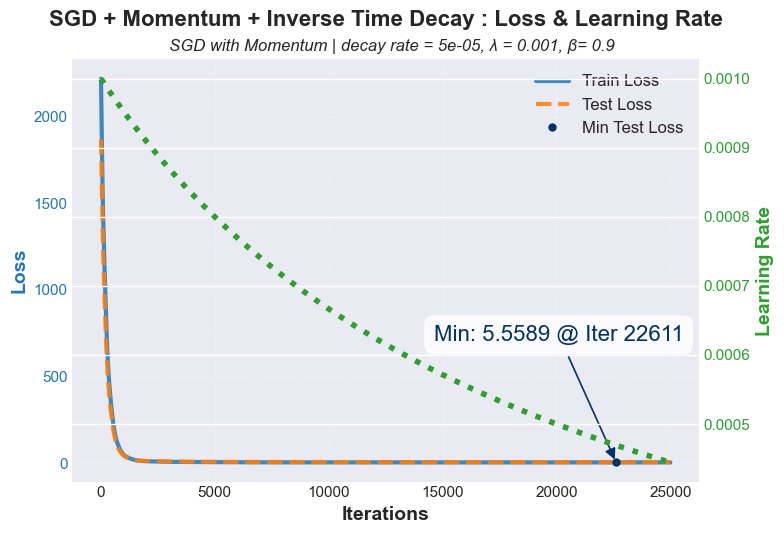

In [ ]:
np.random.seed(42)
n_samples = 500
area = np.random.uniform(10, 50, n_samples)
expected_bedrooms = np.clip((area/15), 0, 4)
bedrooms = np.random.normal(expected_bedrooms, 0.5)
bedrooms = np.round(bedrooms).astype(int)
bedrooms = np.clip(bedrooms, 0, 4)
age = np.random.uniform(0, 30, n_samples)
noise = np.random.normal(0, 2, n_samples)
rent = 1.5 * area + 2 * bedrooms - 0.8 * age + 5 + noise

X = np.column_stack((area, bedrooms, age))
y = rent

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

w = np.random.rand(3)  
b = np.random.rand()

initial_lr = 0.001
iterations = 25000
decay_rate = 0.00005
lambda_reg = 0.001
beta = 0.9
v_w = np.zeros_like(w)
v_b = 0

lr_history_inverse_time = []
w_history = []
b_history = []
loss_history_train_ex1_16 = []
loss_history_test_ex1_16 = []

loss_history_train_ex1_17 = []
loss_history_test_ex1_17 = []

loss_history_train_ex1_18 = []
loss_history_test_ex1_18 = []

print(X_train_standardized.shape)
print(y_train.shape)

for i in range(iterations):
    idx = np.random.randint(0, len(X_train_standardized))
    x_i = X_train_standardized[idx]
    y_i = y_train[idx]

    y_pred_i = np.dot(x_i, w) + b
    error_i = y_i - y_pred_i

    w_gradient = (-2) * x_i * error_i + 2 * lambda_reg * w
    b_gradient = (-2) * error_i

    learning_rate = initial_lr / (1 + decay_rate * i)
    lr_history_inverse_time.append(learning_rate)

    v_w = beta * v_w + (1 - beta) * w_gradient
    v_b = beta * v_b + (1 - beta) * b_gradient

    w -= learning_rate * v_w
    b -= learning_rate * v_b

    w_history.append(w.copy())
    b_history.append(b)

    y_pred_train = np.dot(X_train_standardized, w) + b
    error_train = y_train - y_pred_train
    loss_train = np.mean(error_train ** 2) + lambda_reg * np.sum(w ** 2)
    loss_history_train_ex1_16.append(loss_train)

    y_pred_test = np.dot(X_test_standardized, w) + b
    error_test = y_test - y_pred_test
    loss_test = np.mean(error_test ** 2)
    loss_history_test_ex1_16.append(loss_test)

    if i % 50 == 0 or i == (iterations - 1):
        print(f'iterations {i} : w = {np.round(w, 4)}, b = {b:.4f}, Train Loss = {loss_train:.4f}, Test Loss = {loss_test:.4f}')

# 找出最小 Test Loss 及對應的迭代次數
min_index = np.argmin(loss_history_test_ex1_16)
min_test_loss = loss_history_test_ex1_16[min_index]
best_w = w_history[min_index]
best_b = b_history[min_index]
lr_at_test_loss = lr_history_inverse_time[min_index]

summary_data = {
    'Final Train Loss' : [np.round(loss_history_train_ex1_16[iterations-1], 4)],
    'Final Test Loss' : [np.round(loss_history_test_ex1_16[iterations-1], 4)],
    'Best Iteration' : [min_index],
    'Train Loss @ Best Loss' : [np.round(loss_history_train_ex1_16[min_index], 4)],
    'Best Test Loss' : [np.round(loss_history_test_ex1_16[min_index], 4)],
    'w (params)' : [np.round(best_w, 4)],
    'b (bias)' : [np.round(best_b, 4)],
    'Learning Rate @ Test Loss' : [np.round(lr_at_test_loss, 4)]
}

df_summary = pd.DataFrame(summary_data)
display(df_summary)


# 設定圖表樣式
plt.style.use('seaborn-v0_8-darkgrid')

fig, ax1 = plt.subplots(figsize = (8, 5.5))
fig.text(0.5, 0.893, f'SGD with Momentum | decay rate = {decay_rate}, λ = {lambda_reg}, β= {beta}', ha = 'center', fontsize = 12, style = 'italic')

# 主軸 : 畫 Loss 曲線
color1 = '#1f77b4'       # 藍
color2 = '#ff7f0e'       # 橘
color3 = '#003366'
ax1.set_xlabel('Iterations', fontsize = 14, fontweight = 'bold')
ax1.set_ylabel('Loss', color = color1, fontsize = 14, fontweight = 'bold')
ax1.plot(loss_history_train_ex1_16, label = 'Train Loss', color = color1, linewidth = 3, alpha = 0.85, zorder = 3)
ax1.plot(loss_history_test_ex1_16, label = 'Test Loss', color = color2, linestyle = 'dashed', linewidth = 3, alpha = 0.85, zorder = 3)
ax1.tick_params(axis = 'y', labelcolor = color1)
ax1.plot(min_index, min_test_loss, 'o', markersize = 5, label = 'Min Test Loss', color = color3, zorder = 4)
bbox_props = dict(boxstyle = 'round,pad = 0.4', fc = 'white', lw = 0.8, alpha = 0.85)
ax1.annotate(f'Min: {min_test_loss:.4f} @ Iter {min_index}', xy = (min_index, min_test_loss), xytext = (min_index - 8000, min_test_loss + 700), textcoords = 'data', arrowprops = dict(arrowstyle = '-|>', color = color3, lw = 1.2, zorder = 4), fontsize = 16, color = color3, bbox = bbox_props, zorder = 4)
ax1.legend(loc = 'upper right', fontsize = 12, framealpha = 0.9)
ax1.set_title('SGD + Momentum + Inverse Time Decay : Loss & Learning Rate', fontsize = 16, fontweight = 'bold', pad = 24)
ax1.grid(True, linestyle = 'dashed', linewidth = 0.5, alpha = 0.4, zorder = 0)

# 副軸 : 畫 Learning Rate 曲線
ax2 = ax1.twinx()
color3 = '#2ca02c'      # 綠
ax2.set_ylabel('Learning Rate', color = color3, fontsize = 14, fontweight = 'bold')
ax2.plot(lr_history_inverse_time, label = 'Learning Rate', color = color3, linestyle = 'dotted', linewidth = 4)
ax2.tick_params(axis = 'y', labelcolor = color3)

# 自動調整佈局
fig.tight_layout()
#plt.savefig('ex1_16.png', dpi = 720, bbox_inches = 'tight')
plt.show()


### 實驗 Ex1-21 / Ex1-22 / Ex1-23 Exponential Decay

mean =  [30.1526  1.99   14.6872]
scale =  [11.9856  1.0246  8.5246]
iteration 0 : w = [0.1489 0.2769 0.9847], b = 0.3412, Train_Loss = 2219.7852, Test_Loss = 1868.8441
iteration 50 : w = [ 1.8792  1.9494 -0.0849], b = 4.0139, Train_Loss = 1797.3970, Test_Loss = 1522.4040
iteration 100 : w = [ 3.6134  3.2185 -0.8744], b = 7.9006, Train_Loss = 1421.5975, Test_Loss = 1207.6206
iteration 150 : w = [ 4.5072  3.952  -0.9531], b = 11.0099, Train_Loss = 1177.3264, Test_Loss = 992.9427
iteration 200 : w = [ 5.3127  4.7401 -1.0289], b = 13.9934, Train_Loss = 965.4194, Test_Loss = 807.6815
iteration 250 : w = [ 7.015   5.6811 -1.6962], b = 16.8661, Train_Loss = 758.9673, Test_Loss = 638.2611
iteration 300 : w = [ 8.1019  6.5015 -2.5074], b = 19.4175, Train_Loss = 604.0821, Test_Loss = 512.6056
iteration 350 : w = [ 8.5001  7.0062 -2.7904], b = 21.5053, Train_Loss = 501.3197, Test_Loss = 424.4722
iteration 400 : w = [ 9.0903  7.2322 -3.2861], b = 23.5889, Train_Loss = 407.1073, Test_Loss = 345.79

,Final Train Loss,Final Test Loss,Best Iteration,Train Loss @ Best Test,Best Test Loss,w (params),b (bias),Learning Rate @ Best test
0,3.9299,5.6925,24623,3.9311,5.6884,"[17.4449, 2.6521, -6.8393]",42.6483,0.0001


C:\Users\MignonChen\AppData\Local\Temp\ipykernel_13100\360375856.py:133: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


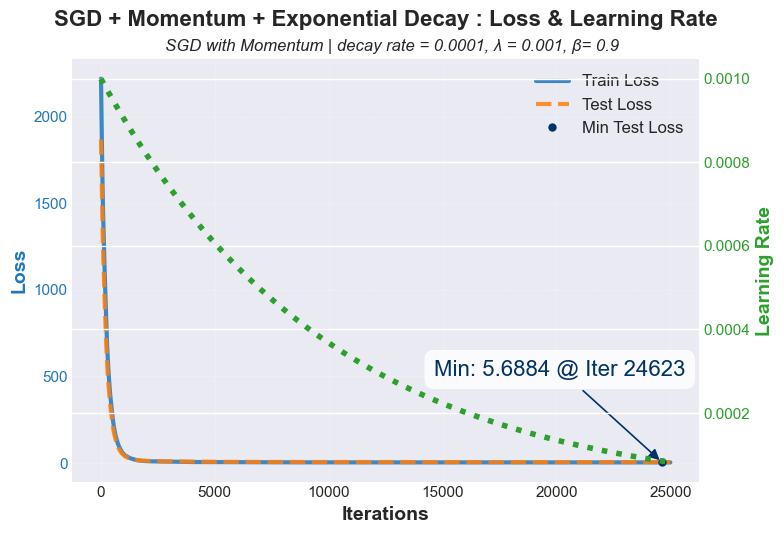

In [ ]:
np.random.seed(42)
n_samples = 500
area = np.random.uniform(10, 50, n_samples)
expected_bedrooms = np.clip((area/15), 0, 4)
bedrooms = np.random.normal(expected_bedrooms, 0.5)
bedrooms = np.round(bedrooms).astype(int)
bedrooms = np.clip(bedrooms, 0, 4)
age = np.random.uniform(0, 30, n_samples)
noise = np.random.normal(0, 2, n_samples)
rent = 1.5 * area + 2 * bedrooms - 0.8 * age + 5 + noise

X = np.column_stack((area, bedrooms, age))
y = rent

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)


# 公式 : X_train_standardized = (X_train - scaler.mean_ ) / scaler.scale_ 
mean = scaler.mean_                      # 每個特徵在訓練資料集的平均值
scale = scaler.scale_                    # 每個特徵在訓練資料集的標準差
print('mean = ', np.round(mean, 4))
print('scale = ', np.round(scale, 4))

w = np.random.rand(3)
b = np.random.rand()

initial_lr = 0.001
iterations = 25000
lambda_reg = 0.001
decay_rate = 0.0001
beta = 0.9
v_w = np.zeros_like(w)
v_b = 0

lr_history_exponential = []
loss_history_train_ex1_21 = []
loss_history_test_ex1_21 = []
w_history = []
b_history = []

for i in range(iterations):
    idx = np.random.randint(0, len(X_train_standardized))
    x_i = X_train_standardized[idx]
    y_i = y_train[idx]

    y_pred_i = np.dot(x_i, w) + b
    error_i = y_i - y_pred_i

    w_gradient = (-2) * x_i * error_i + 2 * lambda_reg * w
    b_gradient = (-2) * error_i

    v_w = beta * v_w + (1 - beta) * w_gradient
    v_b = beta * v_b + (1 - beta) * b_gradient

    learning_rate = initial_lr * math.exp(-decay_rate * i)
    lr_history_exponential.append(learning_rate)

    w -= learning_rate * v_w
    b -= learning_rate * v_b

    w_history.append(w.copy())
    b_history.append(b)

    y_pred_train = np.dot(X_train_standardized, w) + b
    error_train = y_train - y_pred_train
    loss_train = np.mean(error_train ** 2) + lambda_reg * np.sum(w ** 2)
    loss_history_train_ex1_21.append(loss_train)

    y_pred_test = np.dot(X_test_standardized, w) + b
    error_test = y_test - y_pred_test
    loss_test = np.mean(error_test ** 2)
    loss_history_test_ex1_21.append(loss_test)

    if i % 50 == 0 or i == (iterations-1):
        print(f'iteration {i} : w = {np.round(w, 4)}, b = {b:.4f}, Train_Loss = {loss_train:.4f}, Test_Loss = {loss_test:.4f}')

# 找出最小 Test Loss 及對應的迭代次數
min_index = np.argmin(loss_history_test_ex1_21)
min_test_loss = loss_history_test_ex1_21[min_index]
best_w = w_history[min_index]
best_b = b_history[min_index]
lr_at_test_loss = lr_history_exponential[min_index]

summary_data = {
    'Final Train Loss' : [np.round(loss_history_train_ex1_21[iterations-1], 4)],
    'Final Test Loss' : [np.round(loss_history_test_ex1_21[iterations-1], 4)],
    'Best Iteration' : [min_index],
    'Train Loss @ Best Test' : [np.round(loss_history_train_ex1_21[min_index], 4)],
    'Best Test Loss' : [np.round(min_test_loss, 4)],
    'w (params)' : [np.round(best_w, 4)],
    'b (bias)' : [np.round(best_b, 4)], 
    'Learning Rate @ Best test' : [np.round(lr_at_test_loss, 4)]
}

df_summary = pd.DataFrame(summary_data)
display(df_summary)

# 設定圖表樣式
plt.style.use('seaborn-v0_8-darkgrid')

fig, ax1 = plt.subplots(figsize = (8, 5.5))
fig.text(0.5, 0.893, f'SGD with Momentum | decay rate = {decay_rate}, λ = {lambda_reg}, β= {beta}', ha = 'center', fontsize = 12, style = 'italic')

# 主軸 : 畫 Loss 曲線
color1 = '#1f77bc'
color2 = '#ff7f0e'
color3 = '#003366'
ax1.set_xlabel('Iterations', fontsize = 14, fontweight = 'bold')
ax1.set_ylabel('Loss', color = color1, fontsize = 14, fontweight = 'bold')
ax1.plot(loss_history_train_ex1_21, label = 'Train Loss', color = color1, linewidth = 3, alpha = 0.85, zorder = 3)
ax1.plot(loss_history_test_ex1_21, label = 'Test Loss', color = color2, linestyle = 'dashed', linewidth = 3, alpha = 0.85, zorder = 3)
ax1.tick_params(axis = 'y', labelcolor = color1)
ax1.plot(min_index, min_test_loss, 'o', markersize = 5, label = 'Min Test Loss', color = color3, zorder = 4)
bbox_props = dict(boxstyle = 'round,pad = 0.4', fc = 'white', lw = 0.8, alpha = 0.85)
ax1.annotate(f'Min: {min_test_loss:.4f} @ Iter {min_index}', xy = (min_index, min_test_loss), xytext = (min_index - 10000, min_test_loss + 500), textcoords = 'data', arrowprops = dict(arrowstyle = '-|>', color = color3, lw = 1.2, zorder = 4), fontsize = 16, color = color3, bbox = bbox_props, zorder = 4)
ax1.legend(loc = 'upper right', fontsize = 12, framealpha = 0.9)
ax1.set_title('SGD + Momentum + Exponential Decay : Loss & Learning Rate', fontsize = 16, fontweight = 'bold', pad = 24)
ax1.grid(True, linestyle = 'dashed', linewidth = 0.5, alpha = 0.4, zorder = 0)

# 副軸 : 畫 Learning Rate 曲線
ax2 = ax1.twinx()
color3 = '#2ca02c'
ax2.set_ylabel('Learning Rate', color = color3, fontsize = 14, fontweight = 'bold')
ax2.plot(lr_history_exponential, label = 'Learning Rate', color = color3, linestyle = 'dotted', linewidth = 4)
ax2.tick_params(axis = 'y', labelcolor = color3)

# 自動調整佈局
fig.tight_layout()
#fig.savefig('ex1_22.png', dpi = 720, bbox_inches = 'tight')
fig.show()




### 實驗 Ex1-24 / Ex1-25 / Ex1-26 Step Decay

iteration 0: w = [0.5839 0.2816 1.6305], b = 0.8216, Train Loss = 2172.5126, Test Loss = 1814.6918
iteration 50: w = [16.5198  2.1056 -5.7603], b = 43.2953, Train Loss = 7.3851, Test Loss = 10.9034
iteration 100: w = [17.6728  1.1794 -6.4143], b = 43.1946, Train Loss = 5.7947, Test Loss = 8.2800
iteration 150: w = [17.7712  1.9161 -6.5193], b = 42.9094, Train Loss = 4.1954, Test Loss = 6.2606
iteration 200: w = [17.6173  1.9816 -6.7357], b = 42.0460, Train Loss = 4.4752, Test Loss = 6.1455
iteration 250: w = [18.2005  1.8493 -6.3957], b = 42.2315, Train Loss = 4.3214, Test Loss = 5.9088
iteration 300: w = [18.4661  2.0935 -6.7895], b = 42.7025, Train Loss = 4.1650, Test Loss = 5.6133
iteration 350: w = [18.2731  3.5179 -5.6008], b = 43.3253, Train Loss = 8.6791, Test Loss = 11.1283
iteration 400: w = [18.0288  2.4031 -6.8676], b = 43.4803, Train Loss = 4.6840, Test Loss = 6.4049
iteration 450: w = [18.0738  1.2532 -6.6513], b = 42.4709, Train Loss = 4.6121, Test Loss = 6.4511
iteration

,Final Train Loss,Final Test Loss,Best iteration,Train Loss @ Best Test,Best Test Loss,w (params),b (bias),Learning Rate @ Best Test
0,3.8871,5.5837,7094,3.9792,5.499,"[18.2307, 2.0869, -6.9117]",42.5915,0.0125


C:\Users\MignonChen\AppData\Local\Temp\ipykernel_13100\3330093593.py:124: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


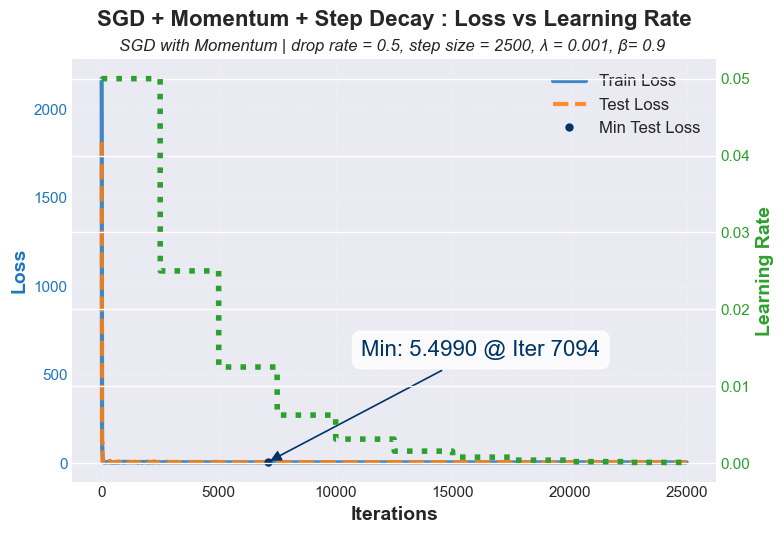

In [ ]:
np.random.seed(42)
n_samples = 500
area = np.random.uniform(10, 50, n_samples)
expected_bedrooms = np.clip((area/15), 0, 4)
bedrooms = np.random.normal(expected_bedrooms, 0.5)
bedrooms = np.round(bedrooms).astype(int)
bedrooms = np.clip(bedrooms, 0, 4)
age = np.random.uniform(0, 30, n_samples)
noise = np.random.normal(0, 2, n_samples)
rent = 1.5 * area + 2 * bedrooms - 0.8 * age + 5 + noise

X = np.column_stack((area, bedrooms, age))
y = rent

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

w = np.random.rand(3)
b = np.random.rand()

initial_lr = 0.05
iterations = 25000
lambda_reg = 0.001
drop_rate = 0.5
step_size = 2500
beta = 0.9
v_w = np.zeros_like(w)
v_b = 0

lr_history_step = []
loss_history_train_ex1_24 = []
loss_history_test_ex1_24 = []
w_history = []
b_history = []

for i in range(iterations):
    idx = np.random.randint(0, len(X_train_standardized))
    x_i = X_train_standardized[idx]
    y_i = y_train[idx]

    y_pred_i = np.dot(x_i, w) + b
    error_i = y_i - y_pred_i

    w_gradient = (-2) * x_i * error_i + 2 * lambda_reg * w
    b_gradient = (-2) * error_i

    v_w = beta * v_w + (1-beta) * w_gradient
    v_b = beta * v_b + (1-beta) * b_gradient

    learning_rate = initial_lr * (drop_rate ** (i//step_size))
    lr_history_step.append(learning_rate)

    w -= learning_rate * v_w
    b -= learning_rate * v_b

    w_history.append(w.copy())
    b_history.append(b)

    y_pred_train = np.dot(X_train_standardized, w) + b
    error_train = y_train - y_pred_train
    loss_train = np.mean(error_train ** 2) + lambda_reg * np.sum(w**2)
    loss_history_train_ex1_24.append(loss_train)

    y_pred_test = np.dot(X_test_standardized, w) + b
    error_test = y_test - y_pred_test
    loss_test = np.mean(error_test ** 2)
    loss_history_test_ex1_24.append(loss_test)

    if i % 50 == 0 or i == (iterations-1):
        print(f'iteration {i}: w = {np.round(w,4)}, b = {b:.4f}, Train Loss = {loss_train:.4f}, Test Loss = {loss_test:.4f}')

min_index = np.argmin(loss_history_test_ex1_24)
min_test_loss = loss_history_test_ex1_24[min_index]   
best_w = w_history[min_index]
best_b = b_history[min_index]
lr_at_test_loss = lr_history_step[min_index]

summary_data = {
    'Final Train Loss' : [np.round(loss_history_train_ex1_24[iterations-1], 4)],
    'Final Test Loss' : [np.round(loss_history_test_ex1_24[iterations-1], 4)],
    'Best iteration' : [min_index],
    'Train Loss @ Best Test' : [np.round(loss_history_train_ex1_24[min_index],4)],
    'Best Test Loss' : [np.round(min_test_loss, 4)],
    'w (params)' : [np.round(best_w, 4)],
    'b (bias)' : [np.round(best_b, 4)],
    'Learning Rate @ Best Test' : [np.round(lr_at_test_loss, 4)]
}

df_summary = pd.DataFrame(summary_data)
display(df_summary)

plt.style.use('seaborn-v0_8-darkgrid')
fig, ax1 = plt.subplots(figsize = (8, 5.5))
fig.text(0.5, 0.893, f'SGD with Momentum | drop rate = {drop_rate}, step size = {step_size}, λ = {lambda_reg}, β= {beta}', ha = 'center', fontsize = 12, style = 'italic')

# 主軸 : 畫 Loss 曲線
color1 = '#1f77bc'
color2 = '#ff7f0e'
color3 = '#003366'
ax1.set_xlabel('Iterations', fontsize = 14, fontweight = 'bold')
ax1.set_ylabel('Loss', color = color1, fontsize = 14, fontweight = 'bold')
ax1.plot(loss_history_train_ex1_24, label = 'Train Loss', color = color1, linewidth = 3, alpha = 0.85, zorder = 3)
ax1.plot(loss_history_test_ex1_24, label = 'Test Loss', color = color2, linestyle = 'dashed', linewidth = 3, alpha = 0.85, zorder = 3)
ax1.tick_params(axis = 'y', labelcolor = color1)
ax1.plot(min_index, min_test_loss, 'o', markersize = 5, label = 'Min Test Loss', color = color3, zorder = 4)
bbox_props = dict(boxstyle = 'round,pad = 0.4', fc = 'white', lw = 0.8, alpha = 0.85)
ax1.annotate(f'Min: {min_test_loss:.4f} @ Iter {min_index}', xy = (min_index, min_test_loss), xytext = (min_index + 4000, min_test_loss + 600), textcoords = 'data', arrowprops = dict(arrowstyle = '-|>', color = color3, lw = 1.2, zorder = 4), fontsize = 16, color = color3, bbox = bbox_props, zorder = 4)
ax1.legend(loc = 'upper right', fontsize = 12, framealpha = 0.9)
ax1.set_title('SGD + Momentum + Step Decay : Loss vs Learning Rate', fontsize = 16, fontweight = 'bold', pad = 24)
ax1.grid(True, linestyle = 'dashed', linewidth = 0.5, alpha = 0.4, zorder = 0)

# 副軸 : 畫 Learning Rate 曲線
ax2 = ax1.twinx()
color3 = '#2ca02c'
ax2.set_ylabel('Learning Rate', color = color3, fontsize = 14, fontweight = 'bold')
ax2.plot(lr_history_step, label = 'Learning Rate', color = color3, linestyle = 'dotted', linewidth = 4)
ax2.tick_params(axis = 'y', labelcolor = color3)

# 自動調整佈局
fig.tight_layout()
#fig.savefig('ex1_24.png', dpi = 720, bbox_inches = 'tight')
fig.show()


### 實驗 Ex1-27 / Ex1-28 / Ex1-29 Polynomial Decay

iteration 0: w = [0.1489 0.2769 0.9847], b = 0.3412, Train Loss = 2219.7852, Test Loss = 1868.8441
iteration 5: w = [0.1531 0.2442 1.0077], b = 0.4619, Train Loss = 2210.8306, Test Loss = 1860.1990
iteration 10: w = [0.3378 0.3698 0.8968], b = 0.7670, Train Loss = 2172.4749, Test Loss = 1829.3121
iteration 15: w = [0.5369 0.5505 0.7636], b = 1.1261, Train Loss = 2127.4034, Test Loss = 1793.0099
iteration 20: w = [0.6805 0.6855 0.6532], b = 1.4857, Train Loss = 2086.6041, Test Loss = 1759.6136
iteration 25: w = [0.9062 0.9824 0.5754], b = 1.8890, Train Loss = 2035.2071, Test Loss = 1716.7274
iteration 30: w = [1.0469 1.223  0.5069], b = 2.2756, Train Loss = 1990.7278, Test Loss = 1679.2712
iteration 35: w = [1.3008 1.4568 0.3425], b = 2.7199, Train Loss = 1937.2953, Test Loss = 1636.2555
iteration 40: w = [1.5571 1.6871 0.2224], b = 3.1734, Train Loss = 1884.5966, Test Loss = 1592.9114
iteration 45: w = [1.7681 1.8648 0.0956], b = 3.6182, Train Loss = 1836.2543, Test Loss = 1553.2177
it

,Final Train,Final Test,Best iteration,Train Loss @ Best Test,Best Test Loss,w (params),b (bias),Learning Rate @ Best Test
0,3.965,5.76,22705,3.9653,5.76,"[17.3093, 2.7479, -6.8084]",42.6224,0.0


C:\Users\MignonChen\AppData\Local\Temp\ipykernel_13100\3414738642.py:123: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


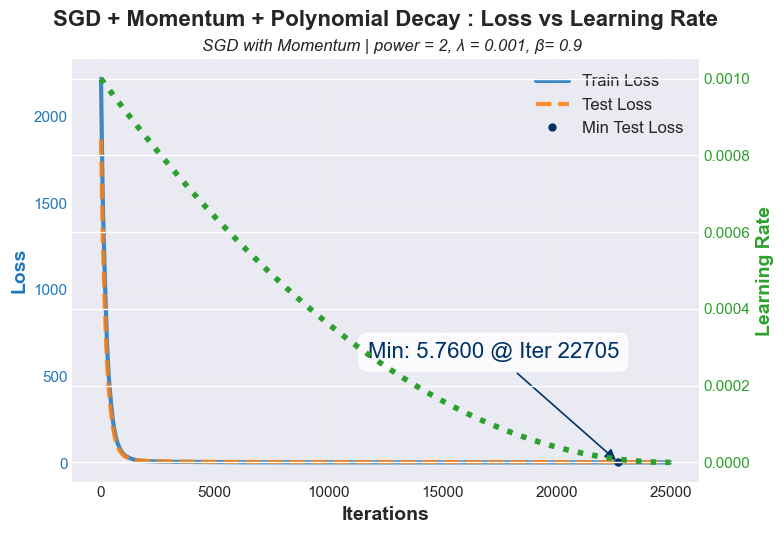

In [ ]:
np.random.seed(42)
n_samples = 500
area = np.random.uniform(10, 50, n_samples)
expected_bedrooms = np.clip((area/15), 0, 4)
bedrooms = np.random.normal(expected_bedrooms, 0.5)
bedrooms = np.round(bedrooms).astype(int)
bedrooms = np.clip(bedrooms, 0, 4)
age = np.random.uniform(0, 30, n_samples)
noise = np.random.normal(0, 2, n_samples)
rent = 1.5 * area + 2 * bedrooms - 0.8 * age + 5 + noise

X = np.column_stack((area, bedrooms, age))
y = rent

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

w = np.random.rand(3)
b = np.random.rand()

initial_lr = 0.001
iterations = 25000
lambda_reg = 0.001
beta = 0.9
v_w = np.zeros_like(w)
v_b = 0
power = 2

lr_history_polynomial = []
loss_history_train_ex1_27 = []
loss_history_test_ex1_27 = []
w_history = []
b_history = []

for i in range(iterations):
    idx = np.random.randint(0, len(X_train_standardized))
    x_i = X_train_standardized[idx]
    y_i = y_train[idx]

    y_pred_i = np.dot(x_i, w) + b
    error_i = y_i - y_pred_i

    w_gradient = (-2) * x_i * error_i + 2 * lambda_reg * w
    b_gradient = (-2) * error_i

    v_w = beta * v_w + (1 - beta) * w_gradient
    v_b = beta * v_b + (1 - beta) * b_gradient

    learning_rate = initial_lr * (1 - (i / iterations)) ** power
    lr_history_polynomial.append(learning_rate)

    w -= learning_rate * v_w
    b -= learning_rate * v_b

    w_history.append(w.copy())
    b_history.append(b)

    y_train_pred = np.dot(X_train_standardized, w) + b
    error_train = y_train - y_train_pred
    loss_train = np.mean(error_train ** 2) + lambda_reg * np.sum(w ** 2)
    loss_history_train_ex1_27.append(loss_train)

    y_test_pred = np.dot(X_test_standardized, w) + b
    error_test = y_test - y_test_pred
    loss_test = np.mean(error_test ** 2)
    loss_history_test_ex1_27.append(loss_test)

    if i % 5 == 0 or i == (iterations-1):
        print(f'iteration {i}: w = {np.round(w, 4)}, b = {b:.4f}, Train Loss = {loss_train:.4f}, Test Loss = {loss_test:.4f}')

min_index = np.argmin(loss_history_test_ex1_27)
min_test_loss = loss_history_test_ex1_27[min_index]
best_w = w_history[min_index]
best_b = b_history[min_index]
lr_at_test_loss = lr_history_polynomial[min_index]

summary_data = {
    'Final Train' : [np.round(loss_history_train_ex1_27[iterations-1], 4)],
    'Final Test' : [np.round(loss_history_test_ex1_27[iterations-1], 4)],
    'Best iteration' : [min_index],
    'Train Loss @ Best Test' : [np.round(loss_history_train_ex1_27[min_index], 4)],
    'Best Test Loss' : [np.round(min_test_loss, 4)],
    'w (params)' : [np.round(best_w, 4)],
    'b (bias)' : [np.round(best_b, 4)],
    'Learning Rate @ Best Test' : [np.round(lr_at_test_loss, 4)]
}

df_summary = pd.DataFrame(summary_data)
display(df_summary)

plt.style.use('seaborn-v0_8-darkgrid')
fig, ax1 = plt.subplots(figsize = (8, 5.5))
fig.text(0.5, 0.893, f'SGD with Momentum | power = {power}, λ = {lambda_reg}, β= {beta}', ha = 'center', fontsize = 12, style = 'italic')

# 主軸
color1 = '#1f77bc'
color2 = '#ff7f0e'
color3 = '#003366'
ax1.set_xlabel('Iterations', fontsize = 14, fontweight = 'bold')
ax1.set_ylabel('Loss', color = color1, fontsize = 14, fontweight = 'bold')
ax1.plot(loss_history_train_ex1_27, label = 'Train Loss', color = color1, linewidth = 3, alpha = 0.85, zorder = 3)
ax1.plot(loss_history_test_ex1_27, label = 'Test Loss', color = color2, linestyle = 'dashed', linewidth = 3, alpha = 0.85, zorder = 3)
ax1.tick_params(axis = 'y', labelcolor = color1)
ax1.plot(min_index, min_test_loss, 'o', markersize = 5, label = 'Min Test Loss', color = color3, zorder = 4)
bbox_props = dict(boxstyle = 'round,pad = 0.4', fc = 'white', lw = 0.8, alpha = 0.85)
ax1.annotate(f'Min: {min_test_loss:.4f} @ Iter {min_index}', xy = (min_index, min_test_loss), xytext = (min_index - 11000, min_test_loss + 600), textcoords = 'data', arrowprops = dict(arrowstyle = '-|>', color = color3, lw = 1.2, zorder = 4), fontsize = 16, color = color3, bbox = bbox_props, zorder = 4)
ax1.legend(loc = 'upper right', fontsize = 12, framealpha = 0.9)
ax1.set_title('SGD + Momentum + Polynomial Decay : Loss vs Learning Rate', fontsize = 16, fontweight = 'bold', pad = 24)
ax1.grid(True, linestyle = 'dashed', linewidth = 0.5, alpha = 0.4, zorder = 0)

# 副軸 : 畫 Learning Rate 曲線
color3 = '#2ca02c'
ax2 = ax1.twinx()
ax2.set_ylabel('Learning Rate', color = color3, fontsize = 14, fontweight = 'bold')
ax2.plot(lr_history_polynomial, label = 'Learning Rate', color = color3, linestyle = 'dotted', linewidth = 4)
ax2.tick_params(axis = 'y', labelcolor = color3)

# 自動調整佈局
fig.tight_layout()
#fig.savefig('ex1_29.png', dpi = 720, bbox_inches = 'tight')
fig.show()



### 實驗 Ex1-30 / Ex1-31 / Ex1-32 SGD + Momentum + Cosine Annealing

iteration 0: w = [0.1844 0.2773 1.0374], b = 0.3804, Train Loss = 2215.8616, Test Loss = 1864.3394
iteration 50: w = [ 7.249   6.9962 -3.6508], b = 16.5836, Train Loss = 742.7601, Test Loss = 651.8417
iteration 100: w = [10.6709  8.5589 -5.5504], b = 28.0929, Train Loss = 233.0959, Test Loss = 209.3250
iteration 150: w = [10.901   8.0413 -5.1463], b = 34.2653, Train Loss = 91.3868, Test Loss = 78.2389
iteration 200: w = [11.2015  7.6725 -5.0439], b = 37.8981, Train Loss = 42.7220, Test Loss = 37.4172
iteration 250: w = [12.8473  7.5506 -6.1681], b = 40.1257, Train Loss = 19.5691, Test Loss = 19.3784
iteration 300: w = [13.2811  6.923  -6.5569], b = 41.2202, Train Loss = 13.1144, Test Loss = 14.3233
iteration 350: w = [13.2784  6.4269 -6.8389], b = 41.7271, Train Loss = 11.2572, Test Loss = 13.1113
iteration 400: w = [14.0415  6.2392 -6.9672], b = 42.5100, Train Loss = 9.0400, Test Loss = 11.1164
iteration 450: w = [14.3608  5.6305 -6.5242], b = 42.8012, Train Loss = 7.8833, Test Loss =

,Final Train Loss,Final Test Loss,Best iteration,Train Loss @ Best Test,Best Test Loss,w (params),b (bias),Learning Rate @ Best Test
0,3.892,5.5921,3669,3.9723,5.4994,"[18.0189, 2.3261, -6.9619]",42.5845,0.0048


C:\Users\MignonChen\AppData\Local\Temp\ipykernel_13100\330907499.py:123: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


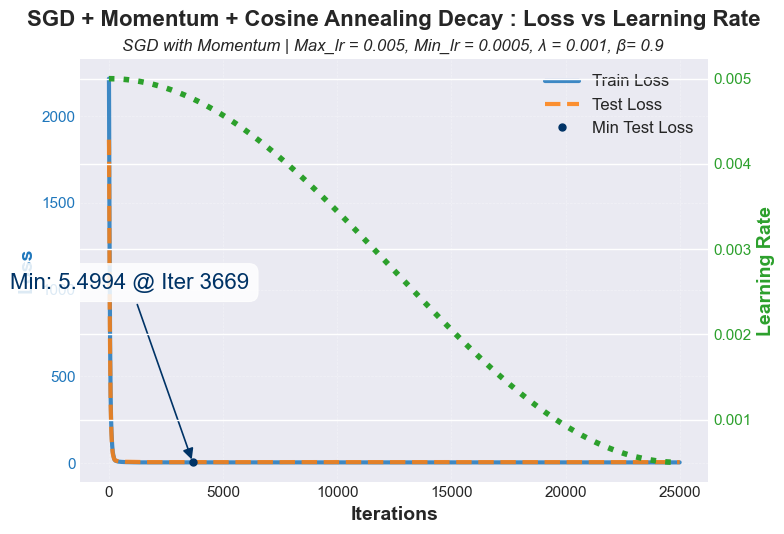

In [ ]:
np.random.seed(42)
n_samples = 500
area = np.random.uniform(10, 50, n_samples)
expected_bedrooms = np.clip((area/15), 0, 4)
bedrooms = np.random.normal(expected_bedrooms, 0.5)
bedrooms = np.round(bedrooms).astype(int)
bedrooms = np.clip(bedrooms, 0, 4)
age = np.random.uniform(0, 30, n_samples)
noise = np.random.normal(0, 2, n_samples)
rent = 1.5 * area + 2 * bedrooms - 0.8 * age + 5 + noise

X = np.column_stack((area, bedrooms, age))
y = rent

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

w = np.random.rand(3)
b = np.random.rand()

initial_lr = 0.005
iterations = 25000
lambda_reg = 0.001
min_lr = 0.0005
beta = 0.9
v_w = np.zeros_like(w)
v_b = 0

lr_history_cosine_annealing = []
loss_history_train_ex1_30 = []
loss_history_test_ex1_30 = []
w_history = []
b_history = []

for i in range(iterations):
    idx = np.random.randint(0, len(X_train_standardized))
    x_i = X_train_standardized[idx]
    y_i = y_train[idx]

    y_pred_i = np.dot(x_i, w) + b
    error_i = y_i - y_pred_i

    w_gradient = (-2) * x_i * error_i + 2 * lambda_reg * w
    b_gradient = (-2) * error_i

    v_w = beta * v_w + (1 - beta) * w_gradient
    v_b = beta * v_b + (1 - beta) * b_gradient

    learning_rate = min_lr + (1/2) * (initial_lr - min_lr) * (1 + math.cos(i / iterations * math.pi))
    lr_history_cosine_annealing.append(learning_rate)

    w -= learning_rate * v_w
    b -= learning_rate * v_b

    w_history.append(w.copy())
    b_history.append(b)

    y_pred_train = np.dot(X_train_standardized, w) + b
    error_train = y_train - y_pred_train
    loss_train = np.mean(error_train ** 2) + lambda_reg * np.sum(w ** 2)
    loss_history_train_ex1_30.append(loss_train)

    y_pred_test = np.dot(X_test_standardized, w) + b
    error_test = y_test - y_pred_test
    loss_test = np.mean(error_test ** 2)
    loss_history_test_ex1_30.append(loss_test)

    if i % 50 == 0 or i == (iterations-1):
        print(f'iteration {i}: w = {np.round(w,4)}, b = {b:.4f}, Train Loss = {loss_train:.4f}, Test Loss = {loss_test:.4f}')

min_index = np.argmin(loss_history_test_ex1_30)
min_test_loss = loss_history_test_ex1_30[min_index]
best_w = w_history[min_index]
best_b = b_history[min_index]
lr_at_test_loss = lr_history_cosine_annealing[min_index]

summary_data = {
    'Final Train Loss' : [np.round(loss_history_train_ex1_30[iterations-1], 4)],
    'Final Test Loss' : [np.round(loss_history_test_ex1_30[iterations-1], 4)],
    'Best iteration' : [min_index],
    'Train Loss @ Best Test' : [np.round(loss_history_train_ex1_30[min_index], 4)],
    'Best Test Loss' : [np.round(loss_history_test_ex1_30[min_index], 4)],
    'w (params)' : [np.round(best_w, 4)],
    'b (bias)' : [np.round(best_b, 4)],
    'Learning Rate @ Best Test' : [np.round(lr_at_test_loss, 4)]
}

df_summary = pd.DataFrame(summary_data)
display(df_summary)

plt.style.use('seaborn-v0_8-darkgrid')
fig, ax1 = plt.subplots(figsize = (8, 5.5))
fig.text(0.5, 0.893, f'SGD with Momentum | Max_lr = {initial_lr}, Min_lr = {min_lr}, λ = {lambda_reg}, β= {beta}', ha = 'center', fontsize = 12, style = 'italic')

# 主軸
color1 = '#1f77bc'
color2 = '#ff7f0e'
color3 = '#003366'
ax1.set_xlabel('Iterations', fontsize = 14, fontweight = 'bold')
ax1.set_ylabel('Loss', color = color1, fontsize = 14, fontweight = 'bold')
ax1.plot(loss_history_train_ex1_30, label = 'Train Loss', color = color1, linewidth = 3, alpha = 0.85, zorder = 3)
ax1.plot(loss_history_test_ex1_30, label = 'Test Loss', color = color2, linewidth = 3, linestyle = 'dashed', alpha = 0.85, zorder = 3)
ax1.tick_params(axis = 'y', labelcolor = color1)
ax1.plot(min_index, min_test_loss, 'o', markersize = 5, label = 'Min Test Loss', color = color3, zorder = 4)
bbox_props = dict(boxstyle = 'round,pad = 0.4', fc = 'white', lw = 0.8, alpha = 0.85)
ax1.annotate(f'Min: {min_test_loss:.4f} @ Iter {min_index}', xy = (min_index, min_test_loss), xytext = (min_index - 8000, min_test_loss + 1000), textcoords = 'data', arrowprops = dict(arrowstyle = '-|>', color = color3, lw = 1.2, zorder = 4), fontsize = 16, color = color3, bbox = bbox_props, zorder = 4)
ax1.legend(loc = 'upper right', fontsize = 12, framealpha = 0.9)
ax1.set_title('SGD + Momentum + Cosine Annealing Decay : Loss vs Learning Rate', fontsize = 16, fontweight = 'bold', pad = 24)
ax1.grid(True, linestyle = 'dashed', linewidth = 0.5, alpha = 0.4, zorder = 0)

# 副軸 : 畫 Learning Rate 曲線
color3 = '#2ca02c'
ax2 = ax1.twinx()
ax2.set_ylabel('Learning Rate', color = color3, fontsize = 14, fontweight = 'bold')
ax2.plot(lr_history_cosine_annealing, label = 'Learning Rate', color = color3, linestyle = 'dotted', linewidth = 4)
ax2.tick_params(axis = 'y', labelcolor = color3)

# 自動調整佈局
fig.tight_layout()
#fig.savefig('ex1_32.png', dpi = 720, bbox_inches = 'tight')
fig.show()

### 實驗 Ex1-33 / Ex1-34 / Ex1-35 SGD + Momentum + Cosine Annealing with Warm Restarts (SGDR)

mean =  [30.1526  1.99   14.6872]
scale =  [11.9856  1.0246  8.5246]
iteration 0 : w = [0.1489 0.2769 0.9847],  b = 0.3412, Train Loss = 2219.7852, Test Loss = 1868.8441
iteration 50 : w = [ 1.8829  1.9531 -0.0874],  b = 4.0220, Train Loss = 1796.5173, Test Loss = 1521.6844
iteration 100 : w = [ 3.6233  3.2265 -0.8799],  b = 7.9233, Train Loss = 1419.5295, Test Loss = 1205.9015
iteration 150 : w = [ 4.5181  3.9606 -0.9588],  b = 11.0402, Train Loss = 1174.9303, Test Loss = 990.9281
iteration 200 : w = [ 5.3218  4.7464 -1.0341],  b = 14.0190, Train Loss = 963.6089, Test Loss = 806.1704
iteration 250 : w = [ 7.0101  5.679  -1.6962],  b = 16.8685, Train Loss = 758.9476, Test Loss = 638.2234
iteration 300 : w = [ 8.0812  6.4875 -2.4936],  b = 19.3774, Train Loss = 606.4133, Test Loss = 514.4797
iteration 350 : w = [ 8.4714  6.9815 -2.7705],  b = 21.4086, Train Loss = 506.0188, Test Loss = 428.4072
iteration 400 : w = [ 9.0391  7.2018 -3.2478],  b = 23.4093, Train Loss = 414.8408, Test Loss

,Final Train,Final Test,Best iteration,Train Loss @ Best Test,Best Test Loss,w (params),b (bias),Learning Rate @ Best Test
0,3.8908,5.5987,19594,3.9167,5.5605,"[17.7187, 2.443, -6.8688]",42.5186,0.0007


C:\Users\MignonChen\AppData\Local\Temp\ipykernel_13100\4137585488.py:144: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


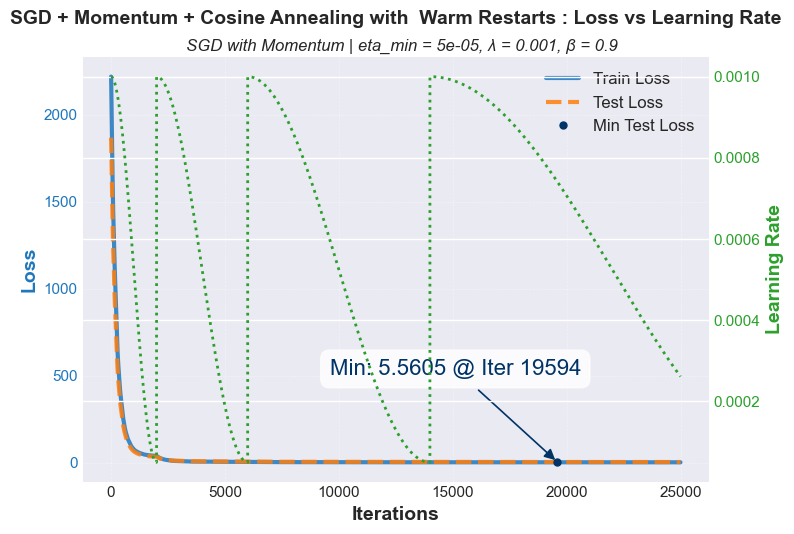

In [ ]:
np.random.seed(42)
n_samples = 500
area = np.random.uniform(10, 50, n_samples)
expected_bedrooms = np.clip((area/15), 0, 4)
bedrooms = np.random.normal(expected_bedrooms, 0.5)
bedrooms = np.round(bedrooms).astype(int)
bedrooms = np.clip(bedrooms, 0, 4)
age = np.random.uniform(0, 30, n_samples)
noise = np.random.normal(0, 2, n_samples)
rent = 1.5 * area + 2 * bedrooms - 0.8 * age + 5 + noise

X = np.column_stack((area, bedrooms, age))
y = rent

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

mean = scaler.mean_
scale = scaler.scale_
print('mean = ', np.round(mean, 4))
print('scale = ', np.round(scale, 4))

w = np.random.rand(3)
b = np.random.rand()

iterations = 25000
lambda_reg = 0.001
beta = 0.9
v_w = np.zeros_like(w)
v_b = 0

eta_max = 0.001
eta_min = 0.00005
T_0 = 2000         # 初始週期長度
T_i = T_0          # 當前週期長度
T_mult = 2         # 週期倍增
gamma = 1          # Max_lr 衰減率

T_cur = 0          # 當前週期內的迭代數
cycle = 0          # 重啟次數

lr_history = []
loss_history_train_ex1_33 = []
loss_history_test_ex1_33 = []
w_history = []
b_history = []

for i in range(iterations):
    idx = np.random.randint(0, len(X_train_standardized))
    x_i = X_train_standardized[idx]
    y_i = y_train[idx]

    y_pred_i = np.dot(x_i, w) + b
    error_i = y_i - y_pred_i

    w_gradient = (-2) * x_i * error_i + 2 * lambda_reg * w
    b_gradient = (-2) * error_i

    v_w = beta * v_w + (1 - beta) * w_gradient
    v_b = beta * v_b + (1 - beta) * b_gradient

    learning_rate = eta_min + (1/2) * (eta_max - eta_min) * (1 + math.cos(T_cur / T_0 * math.pi))
    lr_history.append(learning_rate)

    w -= learning_rate * v_w
    b -= learning_rate * v_b

    w_history.append(w.copy())
    b_history.append(b)

    T_cur += 1
    if T_cur >= T_0:
        T_cur = 0                    # 當前週期迭代數歸0重新開始
        cycle += 1                   # 重啟次數
        T_0 = T_0 * T_mult
        eta_max = eta_max * gamma
    
    y_pred_train = np.dot(X_train_standardized, w) + b
    error_train = y_train - y_pred_train
    loss_train = np.mean(error_train ** 2) + lambda_reg * np.sum(w ** 2)
    loss_history_train_ex1_33.append(loss_train)

    y_pred_test = np.dot(X_test_standardized, w) + b
    error_test = y_test - y_pred_test
    loss_test = np.mean(error_test ** 2)
    loss_history_test_ex1_33.append(loss_test)

    if i % 50 ==0 or i == (iterations-1):
        print(f'iteration {i} : w = {np.round(w, 4)},  b = {b:.4f}, Train Loss = {loss_train:.4f}, Test Loss = {loss_test:.4f}')

min_index = np.argmin(loss_history_test_ex1_33)
min_test_loss = loss_history_test_ex1_33[min_index]
best_w = w_history[min_index]
best_b = b_history[min_index]
lr_at_test_loss = lr_history[min_index]

summary_data = {
    'Final Train' : [np.round(loss_history_train_ex1_33[iterations-1], 4)],
    'Final Test' : [np.round(loss_history_test_ex1_33[iterations-1], 4)],
    'Best iteration' : [min_index],
    'Train Loss @ Best Test' : [np.round(loss_history_train_ex1_33[min_index], 4)],
    'Best Test Loss' : [np.round(min_test_loss, 4)],
    'w (params)' : [np.round(best_w, 4)],
    'b (bias)' : [np.round(best_b, 4)],
    'Learning Rate @ Best Test' : [np.round(lr_at_test_loss, 4)]
}

df_summary = pd.DataFrame(summary_data)
display(df_summary)

# 設定圖表樣式
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax1 = plt.subplots(figsize = (8, 5.5))
fig.text(0.5, 0.893, f'SGD with Momentum | eta_min = {eta_min}, λ = {lambda_reg}, β = {beta}', ha = 'center', fontsize = 12, style = 'italic')

# 主軸
color1 = '#1f77bc'
color2 = '#ff7f0e'
color3 = '#003366'
ax1.set_xlabel('Iterations', fontsize = 14, fontweight = 'bold')
ax1.set_ylabel('Loss', color = color1, fontsize = 14, fontweight = 'bold')
ax1.plot(loss_history_train_ex1_33, label = 'Train Loss', color = color1, linewidth = 3, alpha = 0.85, zorder = 3)
ax1.plot(loss_history_test_ex1_33, label = 'Test Loss', color = color2, linewidth = 3, linestyle = 'dashed', alpha = 0.85, zorder = 3)
ax1.tick_params(axis = 'y', labelcolor = color1)
ax1.plot(min_index, min_test_loss, 'o', markersize = 5, label = 'Min Test Loss', color = color3, zorder = 4)
bbox_props = dict(boxstyle = 'round,pad = 0.4', fc = 'white', lw = 0.8, alpha = 0.85)
ax1.annotate(f'Min: {min_test_loss:.4f} @ Iter {min_index}', xy = (min_index, min_test_loss), xytext = (min_index - 10000, min_test_loss + 500), textcoords = 'data', arrowprops = dict(arrowstyle = '-|>', color = color3, lw = 1.2, zorder = 4), fontsize = 16, color = color3, bbox = bbox_props, zorder = 4)
ax1.legend(loc = 'upper right', fontsize = 12, framealpha = 0.9)
ax1.set_title('SGD + Momentum + Cosine Annealing with  Warm Restarts : Loss vs Learning Rate', fontsize = 14, fontweight = 'bold', pad = 24)
ax1.grid(True, linestyle = 'dashed', linewidth = 0.5, alpha = 0.4, zorder = 0)

# 副軸
color4 = '#2ca02c'
ax2 = ax1.twinx()
ax2.set_ylabel('Learning Rate', color = color4, fontsize = 14, fontweight = 'bold')
ax2.plot(lr_history, label = 'Learning Rate', color = color4, linestyle = 'dotted', linewidth = 2, zorder = 1)
ax2.tick_params(axis = 'y', labelcolor = color4)

# 自動調整佈局
fig.tight_layout()
#fig.savefig('ex1_35.png', dpi = 720, bbox_inches = 'tight')
fig.show()


### 實驗 Ex1-36 Stochastic Gradient Descent (Adagrad Optimizer)

mean =  [30.1526  1.99   14.6872]
scale =  [11.9856  1.0246  8.5246]
Iteration 0 : w = [18.14   18.2768 18.9715], b = 18.3313, Train Loss = 1541.0921, Test Loss = 1385.8286
Iteration 50 : w = [16.2351  4.6738 -5.8303], b = 42.5005, Train Loss = 6.8416, Test Loss = 9.0672
Iteration 100 : w = [17.0551  2.7256 -6.8911], b = 42.9652, Train Loss = 4.1903, Test Loss = 6.2250
Iteration 150 : w = [17.6955  2.6827 -6.5963], b = 43.2471, Train Loss = 4.3985, Test Loss = 6.3667
Iteration 200 : w = [17.6597  2.4184 -6.6342], b = 42.1523, Train Loss = 4.1823, Test Loss = 5.7653
Iteration 250 : w = [18.1292  1.7823 -6.6676], b = 42.3564, Train Loss = 4.0868, Test Loss = 5.7314
Iteration 300 : w = [17.955   2.0791 -7.0188], b = 43.0479, Train Loss = 4.0875, Test Loss = 5.8116
Iteration 350 : w = [17.636   2.773  -7.2027], b = 43.3793, Train Loss = 4.6837, Test Loss = 6.2497
Iteration 400 : w = [17.8667  1.4314 -7.3766], b = 43.0738, Train Loss = 5.0006, Test Loss = 6.9158
Iteration 450 : w = [18.2167

,Final Train,Final Test,Best iteration,Train Loss @ Best Test,Best Test Loss,w (params),b (bias),Learning Rate @ Best Test
0,3.9233,5.5589,24651,3.9831,5.4946,"[18.1742, 2.1727, -6.9317]",42.5875,0.0258


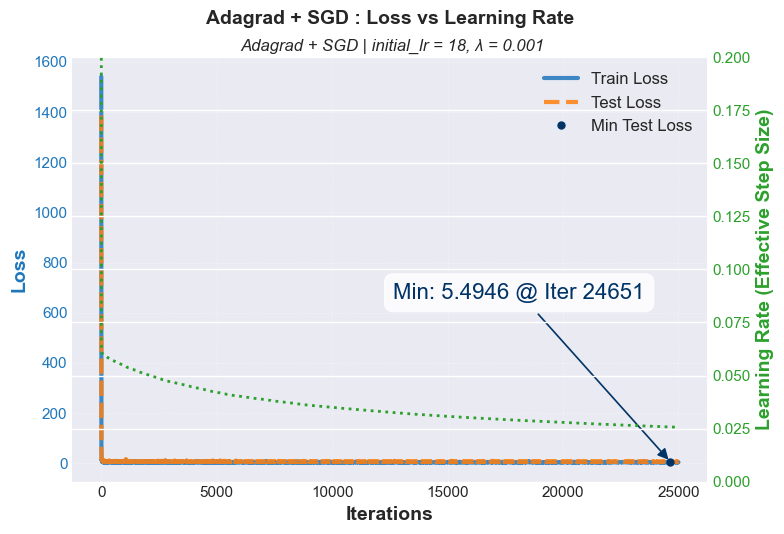

In [ ]:
np.random.seed(42)
n_samples = 500
area = np.random.uniform(10, 50, n_samples)
expected_bedrooms = np.clip((area/15), 0, 4)
bedrooms = np.random.normal(expected_bedrooms, 0.5)
bedrooms = np.round(bedrooms).astype(int)
bedrooms = np.clip(bedrooms, 0, 4)
age = np.random.uniform(0, 30, n_samples)
noise = np.random.normal(0, 2, n_samples)
rent = 1.5 * area + 2 * bedrooms - 0.8 * age + 5 + noise

X = np.column_stack((area, bedrooms, age))
y = rent

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

mean = scaler.mean_
scale = scaler.scale_
print('mean = ', np.round(mean, 4))
print('scale = ', np.round(scale, 4))

w = np.random.rand(3)
b = np.random.rand()

initial_lr = 18
iterations = 25000
lambda_reg = 0.001
epsilon = 1e-8

# Adagrad 累積器
G_w = np.zeros_like(w)
G_b = 0

lr_history_adagrad = []
loss_history_train_ex1_39 = []
loss_history_test_ex1_39 = []
w_history = []
b_history = []

for i in range(iterations):
    idx = np.random.randint(0, len(X_train_standardized))
    x_i = X_train_standardized[idx]
    y_i = y_train[idx]

    y_pred_i = np.dot(x_i, w) + b
    error_i = y_i - y_pred_i

    w_gradient = (-2) * x_i * error_i + 2 * lambda_reg * w
    b_gradient = (-2) * error_i

    G_w += w_gradient ** 2
    G_b += b_gradient ** 2

    # 自適應步長 (隨時間只降不升)
    step_w = initial_lr / (np.sqrt(G_w) + epsilon)
    step_b = initial_lr / (np.sqrt(G_b) + epsilon)

    lr_history_adagrad.append(np.mean(step_w))

    w -= step_w * w_gradient
    b -= step_b * b_gradient

    w_history.append(w.copy())
    b_history.append(b)

    y_pred_train = np.dot(X_train_standardized, w) + b
    error_train = y_train - y_pred_train
    loss_train = np.mean(error_train ** 2) + lambda_reg * np.sum(w ** 2)
    loss_history_train_ex1_39.append(loss_train)

    y_pred_test = np.dot(X_test_standardized, w) + b
    error_test = y_test - y_pred_test
    loss_test = np.mean(error_test ** 2)
    loss_history_test_ex1_39.append(loss_test)

    if i % 50 == 0 or i == (iterations-1):
        print(f'Iteration {i} : w = {np.round(w, 4)}, b = {b:.4f}, Train Loss = {loss_train:.4f}, Test Loss = {loss_test:.4f}')

min_index = np.argmin(loss_history_test_ex1_39)
min_test_loss = loss_history_test_ex1_39[min_index]
best_w = w_history[min_index]
best_b = b_history[min_index]
lr_at_test_loss = lr_history_adagrad[min_index]

summary_data = {
    'Final Train' : [np.round(loss_history_train_ex1_39[iterations-1], 4)],
    'Final Test' : [np.round(loss_history_test_ex1_39[iterations-1], 4)],
    'Best iteration' : [min_index],
    'Train Loss @ Best Test' : [np.round(loss_history_train_ex1_39[min_index], 4)],
    'Best Test Loss' : [np.round(min_test_loss, 4)],
    'w (params)' : [np.round(best_w, 4)],
    'b (bias)' : [np.round(best_b, 4)],
    'Learning Rate @ Best Test' : [np.round(lr_at_test_loss, 4)]
}

df_summary = pd.DataFrame(summary_data)
display(df_summary)

# 設定圖表樣式
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax1 = plt.subplots(figsize = (8, 5.5))
fig.text(0.5, 0.893, f'Adagrad + SGD | initial_lr = {initial_lr}, λ = {lambda_reg}', ha = 'center', fontsize = 12, style = 'italic')

# 主軸
color1 = '#1f77bc'
color2 = '#ff7f0e'
color3 = '#003366'
ax1.set_xlabel('Iterations', fontsize = 14, fontweight = 'bold')
ax1.set_ylabel('Loss', color = color1, fontsize = 14, fontweight = 'bold')
ax1.plot(loss_history_train_ex1_39, label = 'Train Loss', color = color1, linewidth = 3, alpha = 0.85, zorder = 3)
ax1.plot(loss_history_test_ex1_39, label = 'Test Loss', color = color2, linewidth = 3, linestyle = 'dashed', alpha = 0.85, zorder = 3)
ax1.tick_params(axis = 'y', labelcolor = color1)
ax1.plot(min_index, min_test_loss, 'o', markersize = 5, label = 'Min Test Loss', color = color3, zorder = 4)
bbox_props = dict(boxstyle = 'round,pad = 0.4', fc = 'white', lw  = 0.8, alpha = 0.85)
ax1.annotate(f'Min: {min_test_loss:.4f} @ Iter {min_index}', xy = (min_index, min_test_loss), xytext = (min_index - 12000, min_test_loss + 650), textcoords = 'data', arrowprops = dict(arrowstyle = '-|>', color = color3, lw = 1.2, zorder = 4), fontsize = 16, color = color3, bbox = bbox_props, zorder = 4)
ax1.legend(loc = 'upper right', fontsize = 12, framealpha = 0.9)
ax1.set_title('Adagrad + SGD : Loss vs Learning Rate', fontsize = 14, fontweight = 'bold', pad = 24)
ax1.grid(True, linestyle = 'dashed', linewidth = 0.5, alpha = 0.4, zorder = 0)

# 副軸
color3 = '#2ca02c'
ax2 = ax1.twinx()
ax2.set_ylim(0, 0.2)
ax2.set_ylabel('Learning Rate (Effective Step Size)', color = color3, fontsize = 14, fontweight = 'bold')
ax2.plot(lr_history_adagrad, label = 'Learning Rate', color = color3, linewidth = 2, linestyle = 'dotted', zorder = 1)
ax2.tick_params(axis = 'y', labelcolor = color3)

# 自動調整佈局
fig.tight_layout()
fig.savefig('ex1_36.png', dpi = 720, bbox_inches = 'tight')
plt.show()


### 實驗 Ex1-37 Stochastic Gradient Descent (Adagrad Optimizer with SGDR)

mean =  [30.1526  1.99   14.6872]
scale =  [11.9856  1.0246  8.5246]
Iteration 0 : w = [8.14   8.2768 8.9715], b = 8.3313, Train Loss = 1457.6904, Test Loss = 1143.4847
Iteration 50 : w = [13.6793  7.0722 -6.5559], b = 42.4358, Train Loss = 11.6934, Test Loss = 13.2255
Iteration 100 : w = [14.8802  4.7853 -6.7462], b = 42.7440, Train Loss = 7.1267, Test Loss = 9.0179
Iteration 150 : w = [16.1298  3.7849 -6.1597], b = 43.0254, Train Loss = 5.9354, Test Loss = 8.0711
Iteration 200 : w = [16.2638  3.4247 -6.3953], b = 42.2875, Train Loss = 5.5644, Test Loss = 6.9546
Iteration 250 : w = [17.2915  2.6099 -6.6608], b = 42.4455, Train Loss = 4.7434, Test Loss = 5.8589
Iteration 300 : w = [17.7624  2.5736 -6.9446], b = 42.7445, Train Loss = 4.7162, Test Loss = 5.5814
Iteration 350 : w = [17.5762  2.8452 -6.8359], b = 43.0512, Train Loss = 4.9311, Test Loss = 5.9393
Iteration 400 : w = [17.6807  2.1302 -7.0749], b = 43.4169, Train Loss = 5.3303, Test Loss = 6.5056
Iteration 450 : w = [17.8609  

,Final Train,Final Test,Best iteration,Train Loss @ Best Test,Best Test Loss,w (params),b (bias),Learning Rate @ Best Test
0,4.6701,5.6614,3854,4.7369,5.4955,"[18.1457, 2.1524, -6.9392]",42.5319,0.0121


C:\Users\MignonChen\AppData\Local\Temp\ipykernel_13100\2499195610.py:146: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


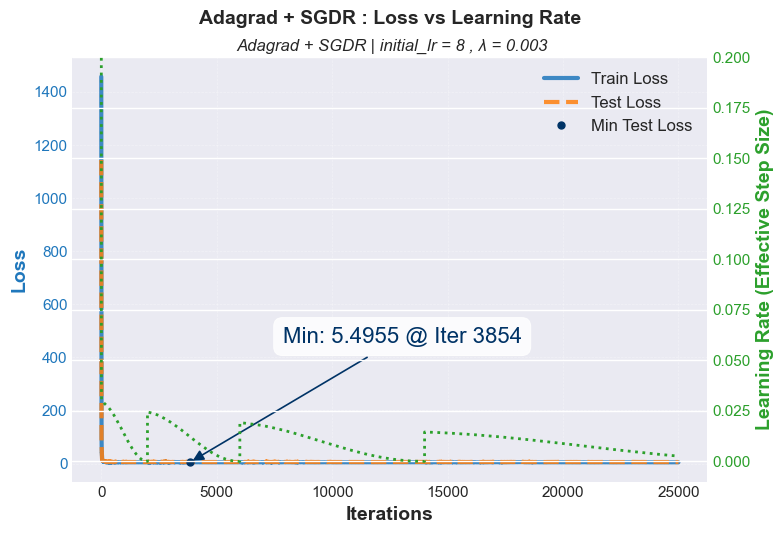

In [ ]:
np.random.seed(42)
n_samples = 500
area = np.random.uniform(10, 50, n_samples)
expected_bedrooms = np.clip((area/15), 0, 4)
bedrooms = np.random.normal(expected_bedrooms, 0.5)
bedrooms = np.round(bedrooms).astype(int)
bedrooms = np.clip(bedrooms, 0, 4)
age = np.random.uniform(0, 30, n_samples)
noise = np.random.normal(0, 2, n_samples)
rent = 1.5 * area + 2 * bedrooms - 0.8 * age + 5 + noise

X = np.column_stack((area, bedrooms, age))
y = rent 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

mean = scaler.mean_
scale = scaler.scale_
print('mean = ', np.round(mean, 4))
print('scale = ', np.round(scale, 4))

w = np.random.rand(3)
b = np.random.rand()

initial_lr = 8
iterations = 25000
lambda_reg = 0.003
eta_min = 1e-6
gamma = 0.98               # 每次重啟後的峰值是否衰減 ; 先設 1 做基準
T_0 = 2000                 # 週期長度
T_i = T_0
T_mult = 2           
T_cur = 0
epsilon = 1e-8

# Adagrad 累積器
G_w = np.zeros_like(w)
G_b = 0

lr_history_adagrad = []
loss_history_train_ex1_40 = []
loss_history_test_ex1_40 = []
w_history = []
b_history = []

for i in range(iterations):
    idx = np.random.randint(0, len(X_train_standardized))
    x_i = X_train_standardized[idx]
    y_i = y_train[idx]

    y_pred_i = np.dot(x_i, w) + b
    error_i = y_i - y_pred_i

    w_gradient = (-2) * x_i * error_i + 2 * lambda_reg * w
    b_gradient = (-2) * error_i

    cos_inner = min(1, T_cur / T_i)
    learning_rate = eta_min + (1/2) * (initial_lr - eta_min) * (1 + math.cos(cos_inner * math.pi))

    G_w += w_gradient ** 2
    G_b += b_gradient ** 2
    step_w = learning_rate / (np.sqrt(G_w) + epsilon)
    step_b = learning_rate / (np.sqrt(G_b) + epsilon)
    lr_history_adagrad.append(np.mean(step_w))

    w -= step_w * w_gradient
    b -= step_b * b_gradient

    w_history.append(w.copy())
    b_history.append(b)

    T_cur += 1
    if T_cur > T_i:
        T_cur = 0
        T_i = int(T_i * T_mult)
        initial_lr *= gamma

    y_pred_train = np.dot(X_train_standardized, w) + b
    error_train = y_train - y_pred_train
    loss_train = np.mean(error_train ** 2) + lambda_reg * np.sum(w ** 2)
    loss_history_train_ex1_40.append(loss_train)

    y_pred_test = np.dot(X_test_standardized, w) + b
    error_test = y_test - y_pred_test
    loss_test = np.mean(error_test ** 2)
    loss_history_test_ex1_40.append(loss_test)

    if i % 50 ==0 or i == (iterations-1):
        print(f'Iteration {i} : w = {np.round(w, 4)}, b = {b:.4f}, Train Loss = {loss_train:.4f}, Test Loss = { loss_test:.4f}')

min_index = np.argmin(loss_history_test_ex1_40)
min_test_loss = loss_history_test_ex1_40[min_index]
best_w = w_history[min_index]
best_b = b_history[min_index]
lr_at_test_loss = lr_history_adagrad[min_index]

df_summary = pd.DataFrame({
    'Final Train' : [np.round(loss_history_train_ex1_40[iterations-1], 4)],
    'Final Test' : [np.round(loss_history_test_ex1_40[iterations-1], 4)],
    'Best iteration' : [min_index],
    'Train Loss @ Best Test' : [np.round(loss_history_train_ex1_40[min_index], 4)],
    'Best Test Loss' : [np.round(min_test_loss, 4)],
    'w (params)' : [np.round(best_w, 4)],
    'b (bias)' : [np.round(best_b, 4)],
    'Learning Rate @ Best Test' : [np.round(lr_at_test_loss, 4)]
})

display(df_summary)

# 設定圖表樣式
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax1 = plt.subplots(figsize = (8, 5.5))
fig.text(0.5, 0.893, f'Adagrad + SGDR | initial_lr = 8 , λ = {lambda_reg}', ha = 'center', fontsize = 12, style = 'italic')

# 主軸
color1 = '#1f77bc'
color2 = '#ff7f0e'
color3 = '#003366'
ax1.set_xlabel('Iterations', fontsize = 14, fontweight = 'bold')
ax1.set_ylabel('Loss', color = color1, fontsize = 14, fontweight = 'bold')
ax1.plot(loss_history_train_ex1_40, label = 'Train Loss', color = color1, linewidth = 3, alpha = 0.85, zorder = 3)
ax1.plot(loss_history_test_ex1_40, label = 'Test Loss', color = color2, linewidth = 3, linestyle = 'dashed', alpha = 0.85, zorder = 3)
ax1.tick_params(axis = 'y', labelcolor = color1)
ax1.plot(min_index, min_test_loss, 'o', markersize = 5, label = 'Min Test Loss', color = color3, zorder = 4)
bbox_props = dict(boxstyle = 'round,pad = 0.4', fc = 'white', lw = 0.8, alpha = 0.85)
ax1.annotate(f'Min: {min_test_loss:.4f} @ Iter {min_index}', xy = (min_index, min_test_loss), xytext = (min_index + 4000, min_test_loss + 450), textcoords = 'data', arrowprops = dict(arrowstyle = '-|>', color = color3, lw = 1.2, zorder = 4), fontsize = 16, color = color3, bbox = bbox_props, zorder = 4)
ax1.legend(loc = 'upper right', fontsize = 12, framealpha = 0.9)
ax1.set_title(f'Adagrad + SGDR : Loss vs Learning Rate', fontsize = 14, fontweight = 'bold', pad = 24)
ax1.grid(True, linestyle = 'dashed', linewidth = 0.5, alpha = 0.4, zorder = 0)

# 副軸
color3 = '#2ca02c'
ax2 = ax1.twinx()
ax2.set_ylim(-0.01, 0.2)
ax2.set_ylabel('Learning Rate (Effective Step Size)', color = color3, fontsize = 14, fontweight = 'bold')
ax2.plot(lr_history_adagrad, label = 'Learning Rate', color = color3, linewidth = 2, linestyle = 'dotted', zorder = 1)
ax2.tick_params(axis = 'y', labelcolor = color3)


# 自動調整佈局
fig.tight_layout()
# fig.savefig('ex1_40.png', dpi = 720, bbox_inches = 'tight')
fig.show()


### 實驗 Ex1-38 Stochastic Gradient Descent (Adagrad Optimizer with SGDR) + 週期性累積器衰減

mean =  [30.1526  1.99   14.6872]
scale =  [11.9856  1.0246  8.5246]
Iteration 0 : w = [10.14   10.2768 10.9715], b = 10.3313, Train Loss = 1381.7404, Test Loss = 1089.6909
Iteration 50 : w = [14.6817  6.2016 -6.3326], b = 42.7622, Train Loss = 8.9016, Test Loss = 11.2408
Iteration 100 : w = [15.8389  3.898  -6.751 ], b = 42.8184, Train Loss = 5.1077, Test Loss = 7.4061
Iteration 150 : w = [16.8737  3.1675 -6.2893], b = 43.0845, Train Loss = 4.6271, Test Loss = 7.0839
Iteration 200 : w = [16.967   2.8523 -6.5453], b = 42.2535, Train Loss = 4.3466, Test Loss = 6.1613
Iteration 250 : w = [17.7726  2.1867 -6.5503], b = 42.3952, Train Loss = 4.0447, Test Loss = 5.7700
Iteration 300 : w = [18.0521  2.2699 -6.9577], b = 42.8326, Train Loss = 3.9910, Test Loss = 5.5681
Iteration 350 : w = [17.7884  2.6681 -6.846 ], b = 43.1506, Train Loss = 4.2763, Test Loss = 5.9750
Iteration 400 : w = [17.8215  1.8485 -7.1589], b = 43.3625, Train Loss = 4.6692, Test Loss = 6.5465
Iteration 450 : w = [18.075

,Final Train,Final Test,Best iteration,Train Loss @ Best Test,Best Test Loss,w (params),b (bias),Learning Rate @ Best Test
0,4.6701,5.6288,20078,3.9898,5.4942,"[18.1343, 2.2171, -6.9477]",42.5444,0.0156


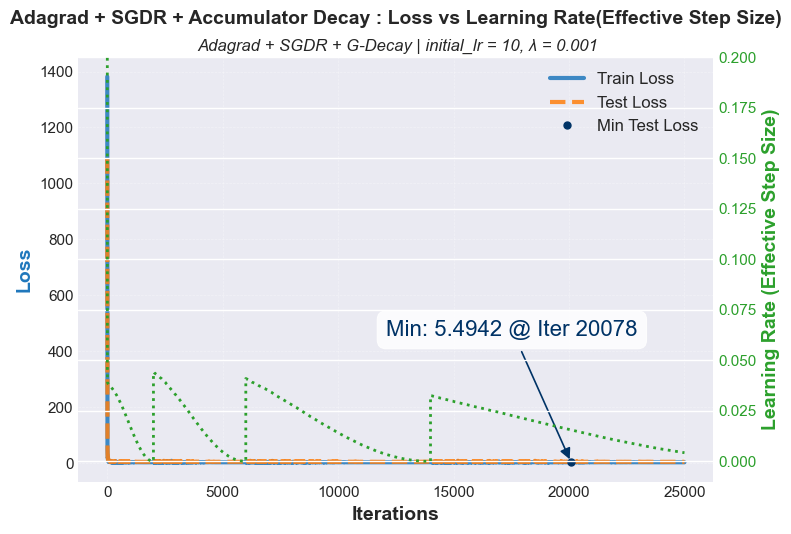

In [ ]:
np.random.seed(42)
n_samples = 500
area = np.random.uniform(10, 50, n_samples)
expected_bedrooms = np.clip((area/15), 0, 4)
bedrooms = np.random.normal(expected_bedrooms, 0.5)
bedrooms = np.round(bedrooms).astype(int)
bedrooms = np.clip(bedrooms, 0, 4)
age = np.random.uniform(0, 30, n_samples)
noise = np.random.normal(0, 2, n_samples)
rent = 1.5 * area + 2 * bedrooms - 0.8 * age + 5 + noise

X = np.column_stack((area, bedrooms, age))
y = rent

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

mean = scaler.mean_
scale = scaler.scale_
print('mean = ', np.round(mean, 4))
print('scale = ', np.round(scale, 4))

w = np.random.rand(3)
b = np.random.rand()

initial_lr = 10
iterations = 25000
lambda_reg = 0.001
eta_min = 1e-6
T_0 = 2000
T_i = T_0
T_mult = 2
gamma = 0.98

# Adagrad 參數
epsilon = 1e-8
G_w = np.zeros_like(w)
G_b = 0

# 週期累積性衰退 (核心)
g_decay = 0.5
g_eps = 1e-12

lr_history_adagrad_gdecay = []
loss_history_train_ex1_41 = []
loss_history_test_ex1_41 = []
w_history = []
b_history = []

T_cur = 0


for i in range(iterations):
    idx = np.random.randint(0, len(X_train_standardized))
    x_i = X_train_standardized[idx]
    y_i = y_train[idx]

    y_pred_i = np.dot(x_i, w) + b
    error_i = y_i - y_pred_i

    w_gradient = (-2) * x_i * error_i + 2 * lambda_reg * w
    b_gradient = (-2) * error_i

    cos_inner = min(1, T_cur/ T_i)
    learning_rate = eta_min + (1/2) * (initial_lr - eta_min) * (1 + math.cos(cos_inner * math.pi))

    G_w += w_gradient ** 2
    G_b += b_gradient ** 2
    step_w = learning_rate / (np.sqrt(G_w) + epsilon)
    step_b = learning_rate / (np.sqrt(G_b) + epsilon)

    w -= step_w * w_gradient
    b -= step_b * b_gradient

    w_history.append(w.copy())
    b_history.append(b)
    lr_history_adagrad_gdecay.append(np.mean(step_w))

    T_cur += 1
    if T_cur >= T_i:
        # 進入下一個週期，重啟學習率
        T_cur = 0
        T_i = int(T_i * T_mult)
        initial_lr *= gamma

        # 週期累積器衰減
        G_w = g_decay * G_w + g_eps
        G_b = g_decay * G_b + g_eps

    
    y_pred_train = np.dot(X_train_standardized, w) + b
    error_train = y_train - y_pred_train
    loss_train = np.mean(error_train ** 2) + lambda_reg * np.sum(w ** 2)
    loss_history_train_ex1_41.append(loss_train)

    y_pred_test = np.dot(X_test_standardized, w) + b
    error_test = y_test - y_pred_test
    loss_test = np.mean(error_test ** 2)
    loss_history_test_ex1_41.append(loss_test)
    
    if i % 50 == 0 or i == (iterations-1):
        print(f'Iteration {i} : w = {np.round(w, 4)}, b = {b:.4f}, Train Loss = {loss_train:.4f}, Test Loss = {loss_test:.4f}')

min_index = np.argmin(loss_history_test_ex1_41)
min_test_loss = loss_history_test_ex1_41[min_index]
best_w = w_history[min_index]
best_b = b_history[min_index]
lr_at_test_loss = lr_history_adagrad_gdecay[min_index]

df_summary = pd.DataFrame({
    'Final Train' : [np.round(loss_history_train_ex1_40[iterations-1], 4)],
    'Final Test' : [np.round(loss_history_test_ex1_41[iterations-1], 4)],
    'Best iteration' : [min_index],
    'Train Loss @ Best Test' : [np.round(loss_history_train_ex1_41[min_index], 4)],
    'Best Test Loss' : [np.round(min_test_loss, 4)],
    'w (params)' : [np.round(best_w, 4)],
    'b (bias)' : [np.round(best_b, 4)],
    'Learning Rate @ Best Test' : [np.round(lr_at_test_loss, 4)]
})

display(df_summary)

# 設定圖表樣式
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax1 = plt.subplots(figsize = (8, 5.5))
fig.text(0.5, 0.893, f'Adagrad + SGDR + G-Decay | initial_lr = 10, λ = {lambda_reg}', ha = 'center', fontsize = 12, style = 'italic')

# 主軸
color1 = '#1f77bc'
color2 = '#ff7f0e'
color3 = '#003366'
ax1.set_xlabel('Iterations', fontsize = 14, fontweight = 'bold')
ax1.set_ylabel('Loss', color = color1, fontsize = 14, fontweight = 'bold')
ax1.plot(loss_history_train_ex1_41, label = 'Train Loss', color = color1, linewidth = 3, alpha = 0.85, zorder = 3)
ax1.plot(loss_history_test_ex1_41, label = 'Test Loss', color = color2, linewidth = 3, linestyle = 'dashed', alpha = 0.85, zorder = 3)
ax1.tick_params(axis = 'y', color = color1)
ax1.plot(min_index, min_test_loss, 'o', markersize = 5, label = 'Min Test Loss', color = color3, zorder = 4)
bbox_props = dict(boxstyle = 'round,pad = 0.4', fc = 'white', lw = 0.8, alpha = 0.85)
ax1.annotate(f'Min: {min_test_loss:.4f} @ Iter {min_index}', xy = (min_index, min_test_loss), xytext = (min_index - 8000, min_test_loss + 450), textcoords = 'data', arrowprops = dict(arrowstyle = '-|>', color = color3, lw = 1.2, zorder = 4), fontsize = 16, color = color3, bbox = bbox_props, zorder = 4)
ax1.legend(loc = 'upper right', fontsize = 12, framealpha = 0.9)
ax1.set_title(f'Adagrad + SGDR + Accumulator Decay : Loss vs Learning Rate(Effective Step Size)', fontsize = 14, fontweight = 'bold', pad = 24)
ax1.grid(True, linestyle = 'dashed', linewidth = 0.5, alpha = 0.4, zorder = 0)

# 副軸
color3 = '#2ca02c'
ax2 = ax1.twinx()
ax2.set_ylim(-0.01, 0.2)
ax2.set_ylabel('Learning Rate (Effective Step Size)', color = color3, fontsize = 14, fontweight = 'bold')
ax2.plot(lr_history_adagrad_gdecay, label = 'Learning Rate (Effective Step Size)', color = color3, linewidth = 2, linestyle = 'dotted', zorder = 1)
ax2.tick_params(axis = 'y', labelcolor = color3)

# 自動調整佈局
fig.tight_layout()
plt.savefig('ex1_41.png', dpi = 720, bbox_inches = 'tight')
plt.show()

### 實驗 Ex1-39 Stochastic Gradient Descent (RMSProp Optimizer)

mean =  [30.1526  1.99   14.6872]
scale =  [11.9856  1.0246  8.5246]
Iteration 0 : w = [1.94   2.0768 2.7715], b = 2.1313, Train Loss = 1984.6091, Test Loss = 1635.1847
Iteration 50 : w = [ 7.0293  5.8357 -3.4268], b = 20.4670, Train Loss = 570.6533, Test Loss = 488.4702
Iteration 100 : w = [ 9.6263  7.2942 -4.4993], b = 28.3220, Train Loss = 237.6754, Test Loss = 203.4318
Iteration 150 : w = [10.7428  7.4177 -4.1605], b = 33.5903, Train Loss = 108.2890, Test Loss = 89.3221
Iteration 200 : w = [10.8896  7.2794 -4.6646], b = 37.3767, Train Loss = 51.1152, Test Loss = 43.7151
Iteration 250 : w = [13.0531  7.1571 -6.0868], b = 40.2067, Train Loss = 18.1799, Test Loss = 18.1153
Iteration 300 : w = [13.8119  6.5124 -6.824 ], b = 41.4933, Train Loss = 11.0268, Test Loss = 12.4234
Iteration 350 : w = [13.9206  5.8759 -7.0521], b = 42.1533, Train Loss = 9.0395, Test Loss = 11.0947
Iteration 400 : w = [15.4257  5.0123 -6.9804], b = 43.3461, Train Loss = 6.7316, Test Loss = 8.9291
Iteration 450 

,Final Train,Final Test,Best Iteration,Train Loss @ Best Test,Best Test Loss,w (params),b (bias),Learning Rate @ Best Test
0,3.9161,5.6243,19715,3.9829,5.4951,"[18.1246, 2.2122, -6.9232]",42.5238,0.0422


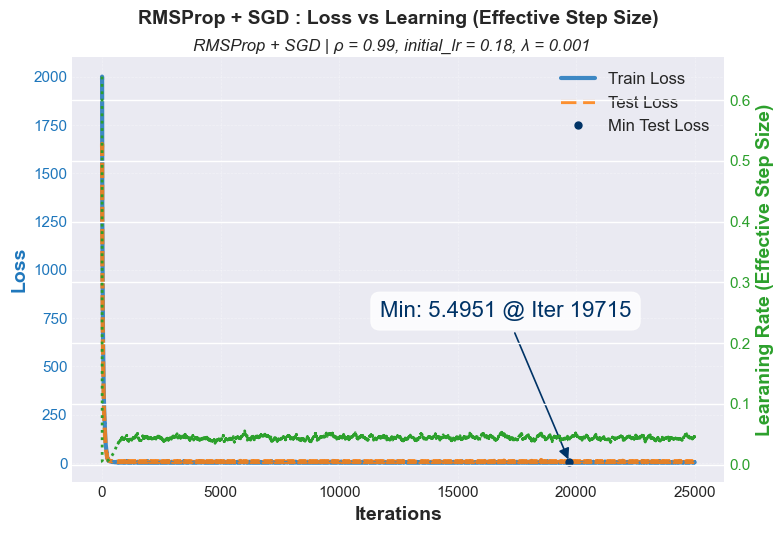

In [ ]:
np.random.seed(42)
n_samples = 500
area = np.random.uniform(10, 50, n_samples)
expected_bedrooms = np.clip((area/15), 0, 4)
bedrooms = np.random.normal(expected_bedrooms, 0.5)
bedrooms = np.round(bedrooms).astype(int)
bedrooms = np.clip(bedrooms, 0, 4)
age = np.random.uniform(0, 30, n_samples)
noise = np.random.normal(0, 2, n_samples)
rent = 1.5 * area + 2 * bedrooms - 0.8 * age + 5 + noise

X = np.column_stack((area, bedrooms, age))
y = rent

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

mean = scaler.mean_
scale = scaler.scale_
print('mean = ', np.round(mean, 4))
print('scale = ', np.round(scale, 4))

w = np.random.rand(3)
b = np.random.rand()

initial_lr = 0.18
iterations = 25000
lambda_reg = 0.001
epsilon = 1e-8
rho = 0.99              # 新增 : RMSProp 平滑係數

# RMSProp 累積器
v_w = np.zeros_like(w)
v_b = 0

lr_history_rmsprop = []
loss_history_train_ex1_39 = []
loss_history_test_ex1_39 = []
w_history = []
b_history = []

for i in range(iterations):
    idx = np.random.randint(0, len(X_train_standardized))
    x_i = X_train_standardized[idx]
    y_i = y_train[idx]

    y_pred_i = np.dot(x_i, w) + b
    error_i = y_i - y_pred_i

    w_gradient = (-2) * x_i * error_i + 2 * lambda_reg * w
    b_gradient = (-2) * error_i

    v_w = rho * v_w + (1 - rho) * (w_gradient ** 2)
    v_b = rho * v_b + (1 - rho) * (b_gradient ** 2)

    step_w = initial_lr / (np.sqrt(v_w) + epsilon)
    step_b = initial_lr / (np.sqrt(v_b) + epsilon)

    lr_history_rmsprop.append(np.mean(step_w))

    w -= step_w * w_gradient
    b -= step_b * b_gradient

    w_history.append(w.copy())
    b_history.append(b)

    y_pred_train = np.dot(X_train_standardized, w) + b
    error_train = y_train - y_pred_train
    loss_train = np.mean(error_train ** 2) + lambda_reg * np.sum(w ** 2)
    loss_history_train_ex1_39.append(loss_train)

    y_pred_test = np.dot(X_test_standardized, w) + b
    error_test = y_test - y_pred_test
    loss_test = np.mean(error_test ** 2)
    loss_history_test_ex1_39.append(loss_test)

    if i % 50 == 0 or i == (iterations-1):
        print(f'Iteration {i} : w = {np.round(w, 4)}, b = {b:.4f}, Train Loss = {loss_train:.4f}, Test Loss = {loss_test:.4f}')

min_index = np.argmin(loss_history_test_ex1_39)
min_test_loss = loss_history_test_ex1_39[min_index]
best_w = w_history[min_index]
best_b = b_history[min_index]
lr_at_test_loss = lr_history_rmsprop[min_index]

df_summary = pd.DataFrame({
    'Final Train' : [np.round(loss_history_train_ex1_39[iterations-1], 4)],
    'Final Test' : [np.round(loss_history_test_ex1_39[iterations-1], 4)],
    'Best Iteration' : [np.round(min_index)],
    'Train Loss @ Best Test' : [np.round(loss_history_train_ex1_39[min_index], 4)],
    'Best Test Loss' : [np.round(min_test_loss, 4)],
    'w (params)' : [np.round(best_w, 4)],
    'b (bias)' : [np.round(best_b, 4)],
    'Learning Rate @ Best Test' : [np.round(lr_at_test_loss, 4)]
})

display(df_summary)

# 設定圖表樣式
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax1 = plt.subplots(figsize = (8, 5.5))
fig.text(0.5, 0.893, f'RMSProp + SGD | ρ = {rho}, initial_lr = {initial_lr}, λ = {lambda_reg}', ha = 'center', fontsize = 12, style = 'italic')

# 主軸
color1 = '#1f77bc'
color2 = '#ff7f0e'
color3 = '#003366'
ax1.set_xlabel('Iterations', fontsize = 14, fontweight = 'bold')
ax1.set_ylabel('Loss', color = color1, fontsize = 14, fontweight = 'bold')
ax1.plot(loss_history_train_ex1_39, label = 'Train Loss', color = color1, linewidth = 3, alpha = 0.85, zorder = 3)
ax1.plot(loss_history_test_ex1_39, label = 'Test Loss', color = color2, linewidth = 3, linestyle = 'dashed', alpha = 0.85, zorder = 3)
ax1.tick_params(axis = 'y', labelcolor = color1)
ax1.plot(min_index, min_test_loss, 'o', markersize = 5, label = 'Min Test Loss', color = color3, zorder = 4)
bbox_props = dict(boxstyle = 'round,pad = 0.4', fc = 'white', lw = 0.8, alpha = 0.85)
ax1.annotate(f'Min: {min_test_loss:.4f} @ Iter {min_index}', xy = (min_index, min_test_loss), xytext = (min_index - 8000, min_test_loss + 750), textcoords = 'data', arrowprops = dict(arrowstyle = '-|>', color = color3, lw = 1.2, zorder = 4), fontsize = 16, color = color3, bbox = bbox_props, zorder = 4)
ax1.legend(loc = 'upper right', fontsize = 12, framealpha = 0.9)
ax1.set_title(f'RMSProp + SGD : Loss vs Learning (Effective Step Size)', fontsize = 14, fontweight = 'bold', pad = 24)
ax1.grid(True, linestyle = 'dashed', linewidth = 0.5, alpha = 0.4, zorder = 0)

# 副軸
color3 = '#2ca02c'
ax2 = ax1.twinx()
# ax2.set_ylim(0, 0.2)
ax2.set_ylabel('Learaning Rate (Effective Step Size)', color = color3, fontsize = 14, fontweight = 'bold')
ax2.plot(lr_history_rmsprop, label = 'Learning Rate', color = color3, linewidth = 2, linestyle = 'dotted', zorder = 1)
ax2.tick_params(axis = 'y', labelcolor = color3)

# 自動調整佈局
fig.tight_layout()
# fig.savefig('ex1_39.png', dpi = 720, bbox_inches = 'tight')
plt.show()


### 實驗 Ex1-40 Stochastic Gradient Descent (RMOSProp Optimizer with SGDR)

mean =  [30.1526  1.99   14.6872]
scale =  [11.9856  1.0246  8.5246]
Iteration 0 : w = [1.14   1.2768 1.9715], b = 1.3313, Train Loss = 2084.9543, Test Loss = 1734.4217
Iteration 50 : w = [ 4.4383  3.7482 -1.5938], b = 12.1702, Train Loss = 1104.1480, Test Loss = 936.1342
Iteration 100 : w = [ 6.5286  5.2462 -2.369 ], b = 17.4913, Train Loss = 734.2420, Test Loss = 621.9670
Iteration 150 : w = [ 7.6098  5.9357 -2.2089], b = 21.5509, Train Loss = 523.2154, Test Loss = 434.7057
Iteration 200 : w = [ 8.1152  6.499  -2.5816], b = 25.2441, Train Loss = 366.5134, Test Loss = 301.0669
Iteration 250 : w = [10.2437  7.4668 -3.5636], b = 28.8330, Train Loss = 223.3250, Test Loss = 185.9552
Iteration 300 : w = [11.1388  7.9855 -4.7887], b = 31.7976, Train Loss = 139.1625, Test Loss = 119.1470
Iteration 350 : w = [11.1778  7.9371 -5.0834], b = 34.1798, Train Loss = 91.9152, Test Loss = 78.5973
Iteration 400 : w = [12.1852  7.7955 -5.4487], b = 36.7809, Train Loss = 50.5205, Test Loss = 44.1605
Ite

,Final Train,Final Test,Best Iteration,Train Loss @ Best Test,Best Test Loss,w (params),b (bias),Learning Rate @ Best Test
0,3.9831,5.6271,21400,3.9787,5.495,"[18.1807, 2.1457, -6.9506]",42.5979,0.0136


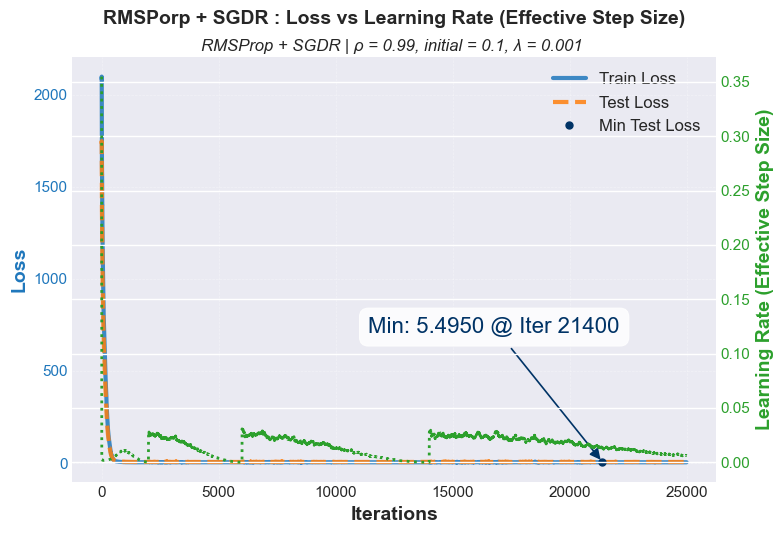

In [ ]:
np.random.seed(42)
n_samples = 500
area = np.random.uniform(10, 50, n_samples)
expected_bedrooms = np.clip((area/15), 0, 4)
bedrooms = np.random.normal(expected_bedrooms, 0.5)
bedrooms = np.round(bedrooms).astype(int)
bedrooms = np.clip(bedrooms, 0, 4)
age = np.random.uniform(0, 30, n_samples)
noise = np.random.normal(0, 2, n_samples)
rent = 1.5 * area + 2 * bedrooms - 0.8 * age + 5 + noise

X = np.column_stack((area, bedrooms, age))
y = rent

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

mean = scaler.mean_
scale = scaler.scale_
print('mean = ', np.round(mean, 4))
print('scale = ', np.round(scale, 4))

w = np.random.rand(3)
b = np.random.rand()

initial_lr = 0.1
iterations = 25000
lambda_reg = 0.001
eta_min = 1e-6
epsilon = 1e-8
rho = 0.99
""" 
ρ = 0.9，最近 10 步的梯度最有影響
ρ = 0.99，記得更久，過去 100 步的梯度還會影響當前
ρ = 0.5，很短期，只看幾步內的變化
"""

T_0 = 2000
T_i = T_0
T_cur = 0
T_mult = 2
gamma = 0.98

v_w = np.zeros_like(w)
v_b = 0

lr_history_rmsprop = []
lr_history = []
loss_history_train_ex1_40 = []
loss_history_test_ex1_40 = []
w_history = []
b_history = []

for i in range(iterations):
    idx = np.random.randint(0, len(X_train_standardized))
    x_i = X_train_standardized[idx]
    y_i = y_train[idx]

    y_pred_i = np.dot(x_i, w) + b
    error_i = y_i - y_pred_i

    w_gradient = (-2) * x_i * error_i + 2 * lambda_reg * w
    b_gradient = (-2) * error_i

    v_w = rho * v_w + (1 - rho) * (w_gradient ** 2)
    v_b = rho * v_b + (1 - rho) * (b_gradient ** 2)

    cos_inner = min(1, T_cur / T_i)
    learning_rate = eta_min + (1/2) * (initial_lr - eta_min) * (1 + math.cos(cos_inner * math.pi))
    lr_history.append(learning_rate)

    step_w = learning_rate / (np.sqrt(v_w) + epsilon)
    step_b = learning_rate / (np.sqrt(v_b) + epsilon)

    lr_history_rmsprop.append(np.mean(step_w))

    T_cur += 1
    if T_cur >= T_i:
        T_cur = 0
        T_i = int(T_i * T_mult)
        initial_lr *= gamma

    w -= step_w * w_gradient
    b -= step_b * b_gradient

    w_history.append(w.copy())
    b_history.append(b)

    y_pred_train = np.dot(X_train_standardized, w) + b
    error_train = y_train - y_pred_train
    loss_train = np.mean(error_train ** 2) + lambda_reg * np.sum(w ** 2)
    loss_history_train_ex1_40.append(loss_train)

    y_pred_test = np.dot(X_test_standardized, w) + b
    error_test = y_test - y_pred_test
    loss_test = np.mean(error_test ** 2)
    loss_history_test_ex1_40.append(loss_test)

    if i % 50 == 0 or i == (iterations-1):
        print(f'Iteration {i} : w = {np.round(w, 4)}, b = {b:.4f}, Train Loss = {loss_train:.4f}, Test Loss = {loss_test:.4f}')

min_index = np.argmin(loss_history_test_ex1_40)
min_test_loss = loss_history_test_ex1_40[min_index]
best_w = w_history[min_index]
best_b = b_history[min_index]
lr_at_test_loss = lr_history_rmsprop[min_index]

df_summary = pd.DataFrame({
    'Final Train' : [np.round(loss_history_train_ex1_40[iterations-1], 4)],
    'Final Test': [np.round(loss_history_test_ex1_40[iterations-1], 4)],
    'Best Iteration' : [min_index],
    'Train Loss @ Best Test' : [np.round(loss_history_train_ex1_40[min_index], 4)],
    'Best Test Loss' : [np.round(min_test_loss, 4)],
    'w (params)' : [np.round(best_w, 4)],
    'b (bias)' : [np.round(best_b, 4)],
    'Learning Rate @ Best Test' : [np.round(lr_at_test_loss, 4)]
})
display(df_summary)

# 設定圖表樣
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax1 = plt.subplots(figsize = (8, 5.5))
fig.text(0.5, 0.893, f'RMSProp + SGDR | ρ = {rho}, initial = 0.1, λ = {lambda_reg}', ha = 'center', fontsize = 12, style = 'italic')

# 主軸
color1 = '#1f77bc'
color2 = '#ff7f0e'
color3 = '#003366'
ax1.set_xlabel('Iterations', fontsize = 14, fontweight = 'bold')
ax1.set_ylabel('Loss', color = color1, fontsize = 14, fontweight = 'bold')
ax1.plot(loss_history_train_ex1_40, label = 'Train Loss', color = color1, linewidth = 3, alpha = 0.85, zorder = 3)
ax1.plot(loss_history_test_ex1_40, label = 'Test Loss', color = color2, linewidth = 3, linestyle = 'dashed', alpha = 0.85, zorder = 3)
ax1.tick_params(axis = 'y', labelcolor = color1)
ax1.plot(min_index, min_test_loss, 'o', markersize = 5, label = 'Min Test Loss', color = color3, zorder = 4)
bbox_props = dict(boxstyle = 'round,pad = 0.4', fc = 'white', lw = 0.8, alpha = 0.85)
ax1.annotate(f'Min: {min_test_loss:.4f} @ Iter {min_index}', xy = (min_index, min_test_loss), xytext = (min_index - 10000, min_test_loss + 700), textcoords = 'data', arrowprops = dict(arrowstyle = '-|>', color = color3, lw = 1.2, zorder = 4), fontsize = 16, color = color3, bbox = bbox_props, zorder = 4)
ax1.legend(loc = 'upper right', fontsize = 12, framealpha = 0.9)
ax1.set_title(f'RMSPorp + SGDR : Loss vs Learning Rate (Effective Step Size)', fontsize = 14, fontweight = 'bold', pad = 24)
ax1.grid(True, linestyle = 'dashed', linewidth = 0.5, alpha = 0.4, zorder = 0)

# 副軸
color3 = '#2ca02c'
ax2 = ax1.twinx()
ax2.set_ylabel('Learning Rate (Effective Step Size)', color = color3, fontsize = 14, fontweight = 'bold')
ax2.plot(lr_history_rmsprop, label = 'Learning Rate', color = color3, linewidth = 2, linestyle = 'dotted', zorder = 3)
# ax2.plot(lr_history, label = 'Learning Rate', color = '#8c56fb', linewidth = 2, linestyle = 'dashdot')
ax2.tick_params(axis = 'y', labelcolor = color3)

# 自動調整佈局
fig.tight_layout()
# fig.savefig('ex1_40.png', dpi = 720, bbox_inches = 'tight')
plt.show()


### 實驗 Ex1-41 Stochastic Gradient Descent (RMOSProp Optimizer with SGDR + Momentum)

mean =  [30.1526  1.99   14.6872]
scale =  [11.9856  1.0246  8.5246]
Iteration 0 : w = [0.26   0.3968 1.0915], b = 0.4513, Train Loss = 2203.8612, Test Loss = 1853.0315
Iteration 50 : w = [ 4.3167  3.6711 -1.3796], b = 10.4498, Train Loss = 1218.5132, Test Loss = 1035.8444
Iteration 100 : w = [ 6.8687  5.4097 -2.6815], b = 17.0269, Train Loss = 747.6201, Test Loss = 639.4758
Iteration 150 : w = [ 7.9062  6.1556 -2.7395], b = 21.8874, Train Loss = 498.8191, Test Loss = 419.0475
Iteration 200 : w = [ 8.7276  6.8253 -2.8982], b = 26.3226, Train Loss = 318.6566, Test Loss = 262.6862
Iteration 250 : w = [10.7733  7.6512 -4.0164], b = 30.3448, Train Loss = 177.9856, Test Loss = 149.2490
Iteration 300 : w = [11.7271  7.9698 -5.0696], b = 33.6705, Train Loss = 99.1478, Test Loss = 85.2830
Iteration 350 : w = [11.7307  7.7613 -5.5422], b = 36.2224, Train Loss = 58.2363, Test Loss = 50.8369
Iteration 400 : w = [12.5538  7.5933 -6.108 ], b = 38.8270, Train Loss = 28.3862, Test Loss = 26.4646
Iter

,Final Train,Final Test,Best Iteration,Train Loss @ Best Test,Best Test Loss,w (params),b (bias),Learning Rate @ Best Test
0,4.0382,5.6582,14176,3.9707,5.494,"[18.1492, 2.1687, -6.9261]",42.565,0.0292


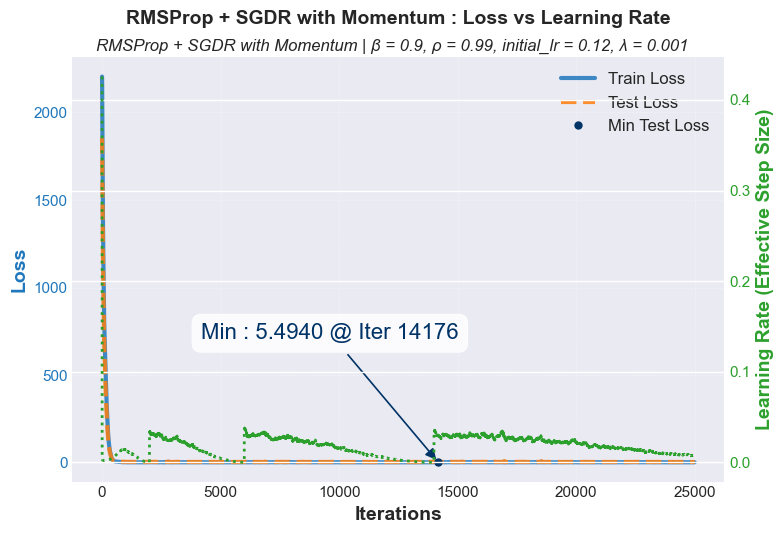

In [ ]:
np.random.seed(42)
n_samples = 500
area = np.random.uniform(10, 50, n_samples)
expected_bedrooms = np.clip((area/15), 0, 4)
bedrooms = np.random.normal(expected_bedrooms, 0.5)
bedrooms = np.round(bedrooms).astype(int)
bedrooms = np.clip(bedrooms, 0, 4)
age = np.random.uniform(0, 30, n_samples)
noise = np.random.normal(0, 2, n_samples)
rent = 1.5 * area + 2 * bedrooms - 0.8 * age + 5 + noise

X = np.column_stack((area, bedrooms, age))
y = rent

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

mean = scaler.mean_
scale = scaler.scale_
print('mean = ', np.round(mean, 4))
print('scale = ', np.round(scale, 4))

w = np.random.rand(3)
b = np.random.rand()

initial_lr = 0.12
iterations = 25000
lambda_reg = 0.001
epsilon = 1e-8
eta_min = 1e-6
beta = 0.9
rho = 0.99

T_0 = 2000
T_i = T_0
T_cur = 0
T_mult = 2
gamma = 0.98

v_w = np.zeros_like(w)
v_b = 0
m_w = np.zeros_like(w)
m_b = 0

lr_history_rmsprop = []
loss_history_train_ex1_41 = []
loss_history_test_ex1_41 = []
w_history = []
b_history = []

for i in range(iterations):
    idx = np.random.randint(0, len(X_train_standardized))
    x_i = X_train_standardized[idx]
    y_i = y_train[idx]

    y_pred_i = np.dot(x_i, w) + b
    error_i = y_i - y_pred_i

    w_gradient = (-2) * x_i * error_i + 2 * lambda_reg * w
    b_gradient = (-2) * error_i

    cos_inner = min(1, T_cur/ T_i)
    learning_rate = eta_min + (1/2) * (initial_lr - eta_min) * (1 + math.cos(cos_inner * math.pi))

    v_w = rho * v_w + (1 - rho) * (w_gradient ** 2)
    v_b = rho * v_b + (1 - rho) * (b_gradient ** 2)

    m_w = beta * m_w + (1 - beta) * w_gradient
    m_b = beta * m_b + (1 - beta) * b_gradient

    step_w = learning_rate / (np.sqrt(v_w) + epsilon)
    step_b = learning_rate / (np.sqrt(v_b) + epsilon)

    lr_history_rmsprop.append(np.mean(step_w))

    T_cur += 1
    if T_cur >= T_i:
        T_cur = 0
        T_i = int(T_i * T_mult)
        initial_lr *= gamma

    w -= step_w * m_w
    b -= step_b * m_b

    w_history.append(w.copy())
    b_history.append(b)

    y_pred_train = np.dot(X_train_standardized, w) + b
    error_train = y_train - y_pred_train
    loss_train = np.mean(error_train ** 2) + lambda_reg * np.sum(w ** 2)
    loss_history_train_ex1_41.append(loss_train)

    y_pred_test = np.dot(X_test_standardized, w) + b
    error_test = y_test - y_pred_test
    loss_test = np.mean(error_test ** 2)
    loss_history_test_ex1_41.append(loss_test)

    if i % 50 == 0 or i == (iterations-1):
        print(f'Iteration {i} : w = {np.round(w, 4)}, b = {b:.4f}, Train Loss = {loss_train:.4f}, Test Loss = {loss_test:.4f}')

min_index = np.argmin(loss_history_test_ex1_41)
min_test_loss = loss_history_test_ex1_41[min_index]
best_w = w_history[min_index]
best_b = b_history[min_index]
lr_at_test_loss = lr_history_rmsprop[min_index]

df_summary = pd.DataFrame({
    'Final Train' : [np.round(loss_history_train_ex1_41[iterations-1], 4)],
    'Final Test' : [np.round(loss_history_test_ex1_41[iterations-1], 4)],
    'Best Iteration' : [min_index],
    'Train Loss @ Best Test' : [np.round(loss_history_train_ex1_41[min_index], 4)],
    'Best Test Loss' : [np.round(min_test_loss, 4)],
    'w (params)' : [np.round(best_w, 4)],
    'b (bias)' : [np.round(best_b, 4)],
    'Learning Rate @ Best Test' : [np.round(lr_at_test_loss, 4)]
})    
display(df_summary)


# 設定圖表圖樣
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax1 = plt.subplots(figsize = (8, 5.5))
fig.text(0.5, 0.893, f'RMSProp + SGDR with Momentum | β = {beta}, ρ = {rho}, initial_lr = 0.12, λ = {lambda_reg}', ha = 'center', fontsize = 12, style = 'italic')

# 主軸
color1 = '#1f77bc'
color2 = '#ff7f0e'
color3 = '#003366'
ax1.set_xlabel('Iterations', fontsize = 14, fontweight = 'bold')
ax1.set_ylabel('Loss', color = color1, fontsize = 14, fontweight = 'bold')
ax1.plot(loss_history_train_ex1_41, label = 'Train Loss', color = color1, linewidth = 3, alpha = 0.85, zorder = 3)
ax1.plot(loss_history_test_ex1_41, label = 'Test Loss', color = color2, linewidth = 3, linestyle = 'dashed', alpha = 0.85, zorder = 3)
ax1.tick_params(axis = 'y', labelcolor = color1)
ax1.plot(min_index, min_test_loss, 'o', markersize = 5, label = 'Min Test Loss', color = color3, zorder = 4)
bbox_props = dict(boxstyle = 'round,pad = 0.4', fc = 'white', lw = 0.8, alpha = 0.85)
ax1.annotate(f'Min : {min_test_loss:.4f} @ Iter {min_index}', xy = (min_index, min_test_loss), xytext = (min_index - 10000, min_test_loss + 700), textcoords = 'data', arrowprops = dict(arrowstyle = '-|>', color = color3, lw = 1.2, zorder = 4), fontsize = 16, color = color3, bbox = bbox_props, zorder = 4)
ax1.legend(loc = 'upper right', fontsize = 12, framealpha = 0.9)
ax1.set_title(f'RMSProp + SGDR with Momentum : Loss vs Learning Rate', fontsize = 14, fontweight = 'bold', pad = 24)
ax1.grid(True, linestyle = 'dashed', linewidth = 0.5, alpha = 0.4, zorder = 0)

# 副軸
color3 = '#2ca02c'
ax2 = ax1.twinx()
ax2.set_ylabel('Learning Rate (Effective Step Size)', color = color3, fontsize = 14, fontweight = 'bold')
ax2.plot(lr_history_rmsprop, label = 'Learning Rate', color = color3, linewidth = 2, linestyle = 'dotted', zorder = 3)
ax2.tick_params(axis = 'y', labelcolor = color3)

# 自動調整佈局
fig.tight_layout()
# fig.savefig('ex1_41.png', dpi = 720, bbox_inches = 'tight')
plt.show()

### 實驗 Ex1-42 Stochastic Gradient Descent (Adam Optimizer)

mean =  [30.1526  1.99   14.6872]
scale =  [11.9856  1.0246  8.5246]
Iteration 0 : w = [4.89   5.0268 5.7215], b = 5.0813, Train Loss = 1678.3935, Test Loss = 1339.9530
Iteration 50 : w = [24.5424 -3.3329 -6.0204], b = 41.7929, Train Loss = 19.6709, Test Loss = 20.1602
Iteration 100 : w = [17.6439  0.8012 -6.5973], b = 42.7377, Train Loss = 6.5298, Test Loss = 8.7270
Iteration 150 : w = [16.6726  1.8428 -5.4566], b = 43.3960, Train Loss = 8.4837, Test Loss = 12.4087
Iteration 200 : w = [18.3228  4.1928 -7.0596], b = 41.9522, Train Loss = 10.0088, Test Loss = 10.3009
Iteration 250 : w = [16.9968  0.2823 -3.9253], b = 42.9553, Train Loss = 19.3917, Test Loss = 24.0361
Iteration 300 : w = [17.521   2.9867 -6.1959], b = 44.1753, Train Loss = 6.8586, Test Loss = 9.8338
Iteration 350 : w = [ 17.0688   0.7315 -10.5654], b = 39.9026, Train Loss = 30.5949, Test Loss = 40.9295
Iteration 400 : w = [ 28.5664   3.6319 -10.5832], b = 36.7045, Train Loss = 192.4119, Test Loss = 202.8793
Iteration 450

,Final Train,Final Test,Best iteration,Train Loss @ Best Test,Best Test Loss,w (params),b (bias),Learning Rate @ Best Test
0,138.3674,191.8681,268,4.5249,5.8502,"[19.1992, 1.2847, -6.8841]",42.6028,4.75


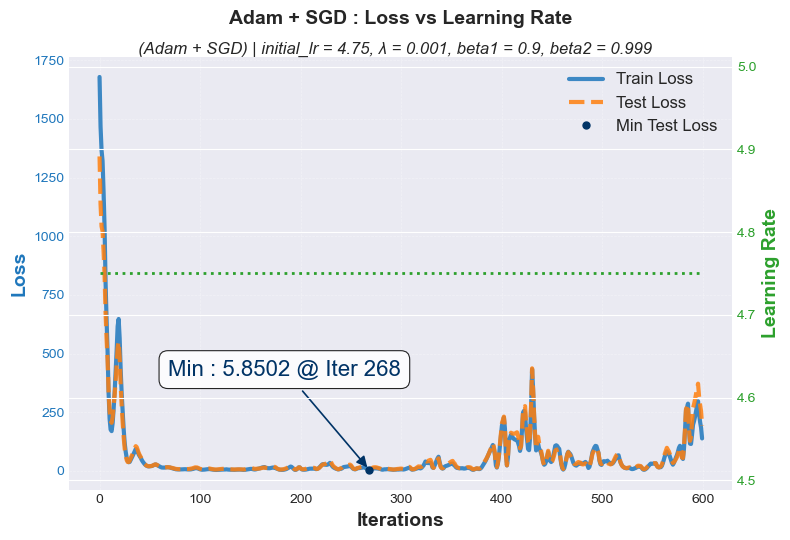

In [3]:
np.random.seed(42)
n_samples = 500
area = np.random.uniform(10, 50, n_samples)
expected_bedrooms = np.clip((area/15), 0, 4)
bedrooms = np.random.normal(expected_bedrooms, 0.5)
bedrooms = np.round(bedrooms).astype(int)
bedrooms = np.clip(bedrooms, 0, 4)
age = np.random.uniform(0, 30, n_samples)
noise = np.random.normal(0, 2, n_samples)
rent = 1.5 * area + 2 * bedrooms - 0.8 * age + 5 + noise

X = np.column_stack((area, bedrooms, age))
y = rent

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

mean = scaler.mean_
scale = scaler.scale_
print('mean = ', np.round(mean, 4))
print('scale = ', np.round(scale, 4))

w = np.random.rand(3)
b = np.random.rand()

initial_lr = 4.75
iterations = 600
lambda_reg = 0.001
epsilon = 1e-8

beta1 = 0.9
beta2 = 0.999

m_w = np.zeros_like(w)
m_b = 0
v_w = np.zeros_like(w)
v_b = 0

lr_history_adam = []
loss_history_train_ex1_42 = []
loss_history_test_ex1_42 = []
w_history = []
b_history = []

for i in range(iterations):
    idx = np.random.randint(0, len(X_train_standardized))
    x_i = X_train_standardized[idx]
    y_i = y_train[idx]

    y_pred_i = np.dot(x_i, w) + b
    error_i = y_i - y_pred_i

    w_gradient = (-2) * x_i * error_i + 2 * lambda_reg * w
    b_gradient = (-2) * error_i

    m_w = beta1 * m_w + (1 - beta1) * w_gradient
    m_b = beta1 * m_b + (1 - beta1) * b_gradient

    v_w = beta2 * v_w + (1 - beta2) * (w_gradient ** 2)
    v_b = beta2 * v_b + (1 - beta2) * (b_gradient ** 2)

    m_w_hat = m_w / (1 - beta1 ** (i+1))
    m_b_hat = m_b / (1 - beta1 ** (i+1))
    v_w_hat = v_w / (1 - beta2 ** (i+1))
    v_b_hat = v_b / (1 - beta2 ** (i+1))

    lr_history_adam.append(initial_lr)

    w -= initial_lr * m_w_hat / (np.sqrt(v_w_hat) + epsilon)
    b -= initial_lr * m_b_hat / (np.sqrt(v_b_hat) + epsilon)

    w_history.append(w.copy())
    b_history.append(b)

    y_pred_train = np.dot(X_train_standardized, w) + b
    error_train = y_train - y_pred_train
    loss_train = np.mean(error_train ** 2) + lambda_reg * np.sum(w ** 2)
    loss_history_train_ex1_42.append(loss_train)

    y_pred_test = np.dot(X_test_standardized, w) + b
    error_test = y_test - y_pred_test
    loss_test = np.mean(error_test ** 2)
    loss_history_test_ex1_42.append(loss_test)

    if i % 50 == 0 or i == (iterations-1):
        print(f'Iteration {i} : w = {np.round(w, 4)}, b = {b:.4f}, Train Loss = {loss_train:.4f}, Test Loss = {loss_test:.4f}')

min_index = np.argmin(loss_history_test_ex1_42)
min_test_loss = loss_history_test_ex1_42[min_index]
best_w = w_history[min_index]
best_b = b_history[min_index]
lr_at_test_loss = lr_history_adam[min_index]

df_summary = pd.DataFrame({
    'Final Train' : [np.round(loss_history_train_ex1_42[iterations-1], 4)],
    'Final Test' : [np.round(loss_history_test_ex1_42[iterations-1], 4)],
    'Best iteration' : [min_index],
    'Train Loss @ Best Test' : [np.round(loss_history_train_ex1_42[min_index], 4)],
    'Best Test Loss' : [np.round(min_test_loss, 4)],
    'w (params)' : [np.round(best_w, 4)],
    'b (bias)' : [np.round(best_b, 4)],
    'Learning Rate @ Best Test' : [np.round(lr_at_test_loss, 4)]
})

display(df_summary)


# 設定圖表樣式
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax1 = plt.subplots(figsize = (8, 5.5))
fig.text(0.5, 0.893, f'(Adam + SGD) | initial_lr = {initial_lr}, λ = {lambda_reg}, beta1 = {beta1}, beta2 = {beta2}', ha = 'center', fontsize = 12, style = 'italic')

# 主軸
color1 = '#1f77bc'
color2 = '#ff7f0e'
color3 = '#003366'
ax1.set_xlabel('Iterations', fontsize = 14, fontweight = 'bold')
ax1.set_ylabel('Loss', color = color1, fontsize = 14, fontweight = 'bold')
ax1.plot(loss_history_train_ex1_42, label = 'Train Loss', color = color1, linewidth = 3, alpha = 0.85, zorder = 3)
ax1.plot(loss_history_test_ex1_42, label = 'Test Loss', color = color2, linewidth = 3, linestyle = 'dashed', alpha = 0.85, zorder = 3)
ax1.tick_params(axis = 'y', labelcolor = color1)
ax1.plot(min_index, min_test_loss, 'o', markersize = 5, label = 'Min Test Loss', color = color3, zorder = 4)
bbox_props = dict(boxstyle = 'round,pad = 0.4', fc = 'white', lw = 0.8, alpha = 0.85)
ax1.annotate(f'Min : {min_test_loss:.4f} @ Iter {min_index}', xy = (min_index, min_test_loss), xytext = (min_index - 200, min_test_loss + 400), textcoords = 'data', arrowprops = dict(arrowstyle = '-|>', color = color3, lw = 1.2, zorder = 4), fontsize = 16, color = color3, bbox = bbox_props, zorder = 4)
ax1.legend(loc = 'upper right', fontsize = 12, framealpha = 0.9)
ax1.set_title(f'Adam + SGD : Loss vs Learning Rate', fontsize = 14, fontweight = 'bold', pad = 24)
ax1.grid(True, linestyle = 'dashed', linewidth = 0.5, alpha = 0.4, zorder = 0)

# 副軸
color3 = '#2ca02c'
ax2 = ax1.twinx()
ax2.set_ylabel('Learning Rate', color = color3, fontsize = 14, fontweight = 'bold')
ax2.plot(lr_history_adam, label = 'Learning Rate', color = color3, linewidth = 2, linestyle = 'dotted', zorder = 3)
ax2.tick_params(axis = 'y', labelcolor = color3)

# 自動調整佈局
fig.tight_layout()
# fig.savefig('ex1_42.png', dpi = 720, bbox_inches = 'tight')
plt.show()

### 實驗 Ex1-43 Stochastic Gradient Descent (Adam Optimizer + Cosine Annealing with Warm Restarts)

mean =  [30.1526  1.99   14.6872]
scale =  [11.9856  1.0246  8.5246]
iteration 0 : w = [0.175  0.3118 1.0065], b = 0.3663, Train Loss = 2215.8196, Test Loss = 1865.0124
iteration 50 : w = [0.8334 0.8338 0.62  ], b = 1.9723, Train Loss = 2036.1820, Test Loss = 1715.9216
iteration 100 : w = [1.513  1.3481 0.302 ], b = 3.5073, Train Loss = 1870.4548, Test Loss = 1577.4680
iteration 150 : w = [1.9682 1.7528 0.2558], b = 4.8787, Train Loss = 1738.1038, Test Loss = 1462.0307
iteration 200 : w = [2.4285 2.235  0.2291], b = 6.3173, Train Loss = 1604.1054, Test Loss = 1345.0000
iteration 250 : w = [ 3.3468  2.8418 -0.0851], b = 7.8115, Train Loss = 1452.5672, Test Loss = 1219.6324
iteration 300 : w = [ 4.0239  3.4507 -0.5321], b = 9.2302, Train Loss = 1319.3724, Test Loss = 1111.3814
iteration 350 : w = [ 4.4135  3.9603 -0.681 ], b = 10.4704, Train Loss = 1216.8421, Test Loss = 1023.9298
iteration 400 : w = [ 4.8653  4.242  -1.0012], b = 11.7617, Train Loss = 1116.4043, Test Loss = 940.6684
ite

,Final Train,Final Test,Best iteration,Train Loss @ Best Test,Best Test Loss,w (params),b (bias),Learning Rate @ Best Test
0,3.9332,5.6305,14510,3.9515,5.4983,"[18.1304, 2.1572, -6.8936]",42.577,0.0329


C:\Users\MignonChen\AppData\Local\Temp\ipykernel_13100\4277394796.py:159: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


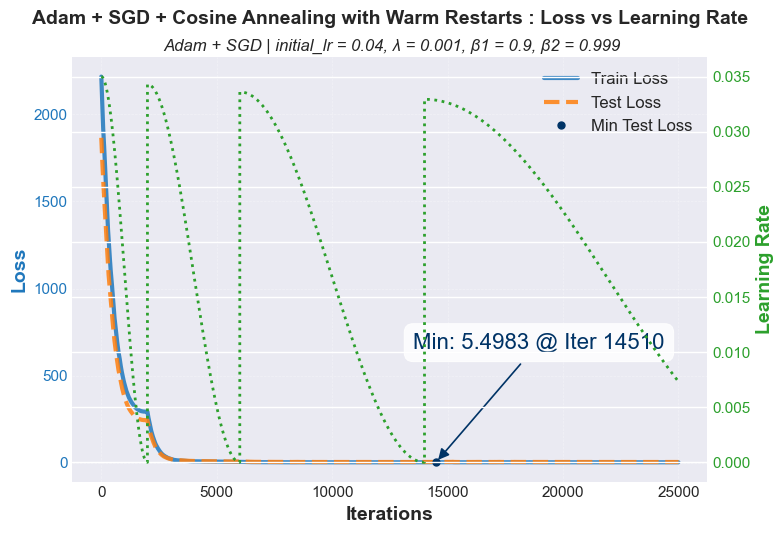

In [ ]:
np.random.seed(42)
n_samples = 500
area = np.random.uniform(10, 50, n_samples)
expected_bedrooms = np.clip((area/15), 0, 4)
bedrooms = np.random.normal(expected_bedrooms, 0.5)
bedrooms = np.round(bedrooms).astype(int)
bedrooms = np.clip(bedrooms, 0, 4)
age = np.random.uniform(0, 30, n_samples)
noise = np.random.normal(0, 2, n_samples)
rent = 1.5 * area + 2 * bedrooms - 0.8 * age + 5 + noise

X = np.column_stack((area, bedrooms, age))
y = rent

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

mean = scaler.mean_
scale = scaler.scale_
print('mean = ', np.round(mean, 4))
print('scale = ', np.round(scale, 4))

w = np.random.rand(3)
b = np.random.rand()

initial_lr = 0.035
iterations = 25000
lambda_reg = 0.001
beta1 = 0.9               # 一階動量衰減
beta2 = 0.999             # 二階動量衰減
epsilon = 1e-8            # 防止除以零
eta_min = 1e-6
T_0 = 2000
T_i = T_0
T_mult = 2                # 週期倍增
T_cur = 0                 # 當前週期內的迭代次數
cycle = 0                 # 重啟次數
gamma = 0.98

m_w = np.zeros_like(w)
v_w = np.zeros_like(w)
m_b = 0
v_b = 0
t = 0                      # 「第幾次更新」(第幾次 iteration), 例如 : 第一次更新 t = 1, 第二次更新 t = 2, 如果不修正，Adam 在初期會因為 m、v 還太小而導致更新過慢

lr_history_adam = []
loss_history_train_ex1_36 = []
loss_history_test_ex1_36 = []
w_history = []
b_history = []

for i in range(iterations):
    t += 1
    idx = np.random.randint(0, len(X_train_standardized))
    x_i = X_train_standardized[idx]
    y_i = y_train[idx]

    y_pred_i = np.dot(x_i, w) + b
    error_i = y_i - y_pred_i

    w_gradient = (-2) * x_i * error_i + 2 * lambda_reg * w
    b_gradient = (-2) * error_i

    # 一階、二階動量更新
    m_w = beta1 * m_w + (1 - beta1) * w_gradient
    v_w = beta2 * v_w + (1 - beta2) * (w_gradient ** 2)
    m_b = beta1 * m_b + (1 - beta1) * b_gradient
    v_b = beta2 * v_b + (1 - beta2) * (b_gradient ** 2)

    # 偏差修正
    m_w_hat = m_w / (1 - beta1 ** t)
    v_w_hat = v_w / (1 - beta2 ** t)
    m_b_hat = m_b / (1 - beta1 ** t)
    v_b_hat = v_b / (1 - beta2 ** t)

    cos_inner = min(1, T_cur/ T_i)
    learning_rate = eta_min + (1/2) * (initial_lr - eta_min) * (1 + math.cos(cos_inner * math.pi))
    lr_history_adam.append(learning_rate)

    w -= learning_rate * (m_w_hat / (np.sqrt(v_w_hat) + epsilon))
    b -= learning_rate * (m_b_hat / (np.sqrt(v_b_hat) + epsilon))

    w_history.append(w.copy())
    b_history.append(b)

    T_cur += 1
    if T_cur >= T_i:
        T_cur = 0
        cycle += 1
        T_i = int(T_i * T_mult)
        initial_lr *= gamma
    
    y_pred_train = np.dot(X_train_standardized, w) + b
    error_train = y_train - y_pred_train
    loss_train = np.mean(error_train ** 2) + lambda_reg * np.sum(w ** 2)
    loss_history_train_ex1_36.append(loss_train)

    y_pred_test = np.dot(X_test_standardized, w) + b
    error_test = y_test - y_pred_test
    loss_test = np.mean(error_test ** 2)
    loss_history_test_ex1_36.append(loss_test)

    if i % 50 == 0 or i == (iterations-1):
        print(f'iteration {i} : w = {np.round(w, 4)}, b = {b:.4f}, Train Loss = {loss_train:.4f}, Test Loss = {loss_test:.4f}')

min_index = np.argmin(loss_history_test_ex1_36)
min_test_loss = loss_history_test_ex1_36[min_index]
best_w = w_history[min_index]
best_b = b_history[min_index]
lr_at_test_loss = lr_history_adam[min_index]

summary_data = {
    'Final Train' : [np.round(loss_history_train_ex1_36[iterations-1], 4)],
    'Final Test' : [np.round(loss_history_test_ex1_36[iterations-1], 4)],
    'Best iteration' : [min_index],
    'Train Loss @ Best Test' : [np.round(loss_history_train_ex1_36[min_index], 4)],
    'Best Test Loss' : [np.round(min_test_loss, 4)],
    'w (params)' : [np.round(best_w, 4)],
    'b (bias)' : [np.round(best_b, 4)],
    'Learning Rate @ Best Test' : [np.round(lr_at_test_loss, 4)]
}

df_summary = pd.DataFrame(summary_data)
display(df_summary)
    
# 設定圖表樣式
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax1 = plt.subplots(figsize = (8, 5.5))
fig.text(0.5, 0.893, f'Adam + SGD | initial_lr = 0.04, λ = {lambda_reg}, β1 = {beta1}, β2 = {beta2}', ha = 'center', fontsize = 12, style = 'italic')

# 主軸
color1 = '#1f77bc'
color2 = '#ff7f0e'
color3 = '#003366'
ax1.set_xlabel('Iterations', fontsize = 14, fontweight = 'bold')
ax1.set_ylabel('Loss', color = color1, fontsize = 14, fontweight = 'bold')
ax1.plot(loss_history_train_ex1_36, label = 'Train Loss', color = color1, linewidth = 3, alpha = 0.85, zorder = 3)
ax1.plot(loss_history_test_ex1_36, label = 'Test Loss', color = color2, linewidth = 3, linestyle = 'dashed', alpha = 0.85, zorder = 3)
ax1.tick_params(axis = 'y', labelcolor = color1)
ax1.plot(min_index, min_test_loss, 'o', markersize = 5, label = 'Min Test Loss', color = color3, zorder = 4)
bbox_props = dict(boxstyle = 'round,pad = 0.4', fc = 'white', lw = 0.8, alpha = 0.85)
ax1.annotate(f'Min: {min_test_loss:.4f} @ Iter {min_index}', xy = (min_index, min_test_loss), xytext = (min_index - 1000, min_test_loss + 650), textcoords = 'data', arrowprops = dict(arrowstyle = '-|>', color = color3, lw = 1.2, zorder = 4), fontsize = 16, color = color3, bbox = bbox_props, zorder = 4)
ax1.legend(loc = 'upper right', fontsize = 12, framealpha = 0.9)
ax1.set_title('Adam + SGD + Cosine Annealing with Warm Restarts : Loss vs Learning Rate', fontsize = 14, fontweight = 'bold', pad = 24)
ax1.grid(True, linestyle = 'dashed', linewidth = 0.5, alpha = 0.4, zorder = 0)

# 副軸
color3 = '#2ca02c'
ax2 = ax1.twinx()
ax2.set_ylabel('Learning Rate', color = color3, fontsize = 14, fontweight = 'bold')
ax2.plot(lr_history_adam, label = 'Learning Rate', color = color3, linestyle = 'dotted', linewidth = 2, zorder = 1)
ax2.tick_params(axis = 'y', labelcolor = color3)

# 自動調整佈局
fig.tight_layout()
#fig.savefig('ex1_38.png', dpi = 720, bbox_inches = 'tight')
fig.show()


### 實驗 Ex1-44 Adam Optimizer + Mini-Batch (batch size = 128)

mean =  [30.1526  1.99   14.6872]
scale =  [11.9856  1.0246  8.5246]
Iteration 0 : w = [ 2.9542  3.0479 -0.8635], b = 3.2075, Train Loss = 1791.6813, Test Loss = 1541.7982
Iteration 50 : w = [16.321   3.8368 -6.7955], b = 41.0244, Train Loss = 7.3287, Test Loss = 8.4719
Iteration 100 : w = [17.7564  2.3097 -6.8228], b = 42.6483, Train Loss = 3.8865, Test Loss = 5.6083
Iteration 150 : w = [17.7807  2.3327 -6.7976], b = 42.6732, Train Loss = 3.8889, Test Loss = 5.6058
Iteration 200 : w = [17.7769  2.2848 -6.8698], b = 42.6548, Train Loss = 3.8876, Test Loss = 5.5963
Iteration 250 : w = [17.8196  2.2928 -6.7566], b = 42.6255, Train Loss = 3.8935, Test Loss = 5.6015
Iteration 300 : w = [17.9171  2.2843 -6.7361], b = 42.6541, Train Loss = 3.9107, Test Loss = 5.5880
Iteration 350 : w = [17.7859  2.3336 -7.0351], b = 42.6830, Train Loss = 3.9294, Test Loss = 5.5807
Iteration 400 : w = [17.8233  2.3709 -6.9001], b = 42.7080, Train Loss = 3.9054, Test Loss = 5.5633
Iteration 450 : w = [17.7977 

,Final Train,Final Test,Best Iteration,Train Loss @ Best Test,Best Test Loss,w (params),b (bias),Learning Rate @ Best Test
0,3.9226,5.6499,545,3.9785,5.4965,"[17.7657, 2.2001, -6.8251]",42.6756,0.51


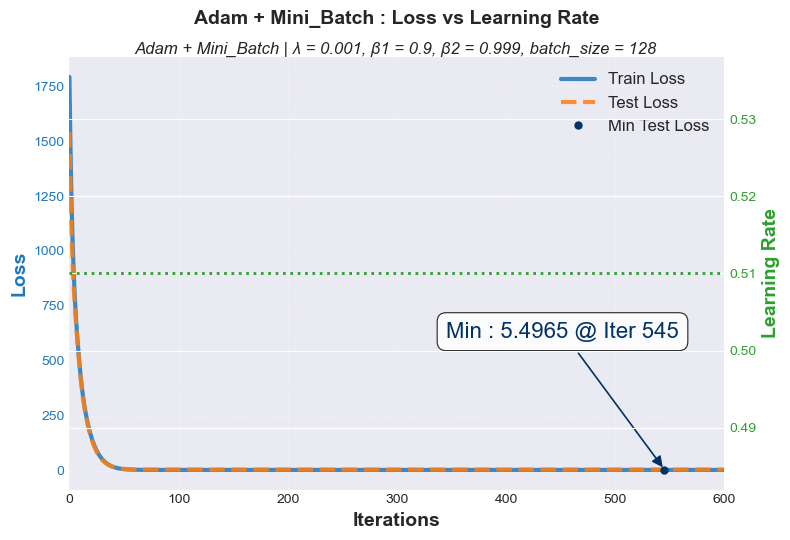

In [ ]:
np.random.seed(42)
n_samples = 500
area = np.random.uniform(10, 50, n_samples)
expected_bedrooms = np.clip((area/15), 0, 4)
bedrooms = np.random.normal(expected_bedrooms, 0.5)
bedrooms = np.round(bedrooms).astype(int)
bedrooms = np.clip(bedrooms, 0, 4)
age = np.random.uniform(0, 30, n_samples)
noise = np.random.normal(0, 2, n_samples)
rent = 1.5 * area + 2 * bedrooms - 0.8 * age + 5 + noise

X = np.column_stack((area, bedrooms, age))
y = rent

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

mean = scaler.mean_
scale = scaler.scale_
print('mean = ', np.round(mean, 4))
print('scale = ', np.round(scale, 4))

w = np.random.rand(3)
b = np.random.rand()

learning_rate = 0.78
iterations = 600
lambda_reg = 0.001
epsilon = 1e-8
beta1 = 0.9
beta2 = 0.999
batch_size = 128
m_w = np.zeros_like(w)
m_b = 0
v_w = np.zeros_like(w)
v_b = 0

lr_history_adam_mini_batch = []
loss_history_train_ex1_44 = []
loss_history_test_ex1_44 = []
w_history = []
b_history = []

for i in range(iterations):
    np.random.seed(42+i)
    permutation = np.random.permutation(len(X_train_standardized))
    X_shuffled = X_train_standardized[permutation]
    y_shuffled = y_train[permutation]

    for start_idx in range(0, len(X_train_standardized), batch_size):
        end_idx = start_idx + batch_size
        X_batch = X_shuffled[start_idx:end_idx]
        y_batch = y_shuffled[start_idx:end_idx]

        y_pred_batch = np.dot(X_batch, w) + b
        error_batch = y_batch - y_pred_batch
        
        w_gradient = (-2/ len(X_batch)) * np.dot(X_batch.T, error_batch) + 2 * lambda_reg * w
        b_gradient = (-2/ len(X_batch)) * np.sum(error_batch)

        m_w = m_w * beta1 + (1 - beta1) * w_gradient
        m_b = m_b * beta1 + (1 - beta1) * b_gradient
        v_w = v_w * beta2 + (1 - beta2) * (w_gradient ** 2)
        v_b = v_b * beta2 + (1 - beta2) * (b_gradient ** 2)

        m_w_hat = m_w / (1 - beta1 ** (i + 1))
        m_b_hat = m_b / (1 - beta1 ** (i + 1))
        v_w_hat = v_w / (1 - beta2 ** (i + 1))
        v_b_hat = v_b / (1 - beta2 ** (i + 1))
   
        w -= learning_rate * m_w_hat / (np.sqrt(v_w_hat) + epsilon)
        b -= learning_rate * m_b_hat / (np.sqrt(v_b_hat) + epsilon)

        w_history.append(w.copy())
        b_history.append(b)
        lr_history_adam_mini_batch.append(learning_rate)

    y_pred_train = np.dot(X_train_standardized, w) + b 
    error_train = y_train - y_pred_train
    loss_train = np.mean(error_train ** 2) + lambda_reg * np.sum(w ** 2)
    loss_history_train_ex1_44.append(loss_train)

    y_pred_test = np.dot(X_test_standardized, w) + b
    error_test = y_test - y_pred_test
    loss_test = np.mean(error_test ** 2)
    loss_history_test_ex1_44.append(loss_test)

    if i % 50 == 0 or i == (iterations-1):
        print(f'Iteration {i} : w = {np.round(w, 4)}, b = {b:.4f}, Train Loss = {loss_train:.4f}, Test Loss = {loss_test:.4f}')

min_index = np.argmin(loss_history_test_ex1_44)
min_test_loss = loss_history_test_ex1_44[min_index]
best_w = w_history[min_index]
best_b = b_history[min_index]
lr_at_test_loss = lr_history_adam_mini_batch[min_index]

df_summary = pd.DataFrame({
    'Final Train' : [np.round(loss_history_train_ex1_44[iterations-1], 4)],
    'Final Test' : [np.round(loss_history_test_ex1_44[iterations-1], 4)],
    'Best Iteration' : [min_index],
    'Train Loss @ Best Test' : [np.round(loss_history_train_ex1_44[min_index], 4)],
    'Best Test Loss' : [np.round(min_test_loss, 4)],
    'w (params)' : [np.round(best_w , 4)],
    'b (bias)' : [np.round(best_b, 4)],
    'Learning Rate @ Best Test' : [np.round(lr_at_test_loss, 4)]
})

display(df_summary)


# 設定圖表樣式
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax1 = plt.subplots(figsize = (8, 5.5))
fig.text(0.5, 0.893, f'Adam + Mini_Batch | λ = {lambda_reg}, β1 = {beta1}, β2 = {beta2}, batch_size = {batch_size}', ha = 'center', fontsize = 12, style = 'italic')

# 主軸
color1 = '#1f77bc'
color2 = '#ff7f0e'
color3 = '#003366'
ax1.set_xlabel('Iterations', fontsize = 14, fontweight = 'bold')
ax1.set_xlim(0, 600)
ax1.set_ylabel('Loss', color = color1, fontsize = 14, fontweight = 'bold')
ax1.plot(loss_history_train_ex1_44, label = 'Train Loss', color = color1, linewidth = 3, alpha = 0.85, zorder = 3)
ax1.plot(loss_history_test_ex1_44, label = 'Test Loss', color = color2, linewidth = 3, linestyle = 'dashed', alpha = 0.85, zorder = 3)
ax1.tick_params(axis = 'y', labelcolor = color1)
ax1.plot(min_index, min_test_loss, 'o', markersize = 5, label = 'Min Test Loss', color = color3, zorder = 4)
bbox_props = dict(boxstyle = 'round,pad = 0.4', fc = 'white', lw = 0.8, alpha = 0.85)
ax1.annotate(f'Min : {min_test_loss:.4f} @ Iter {min_index}', xy = (min_index, min_test_loss), xytext = (min_index - 200, min_test_loss + 600), textcoords = 'data', arrowprops = dict(arrowstyle = '-|>', color = color3, lw = 1.2, zorder = 4), fontsize = 16, color = color3, bbox = bbox_props, zorder = 4)
ax1.legend(loc = 'upper right', fontsize = 12, framealpha = 0.9)
ax1.set_title('Adam + Mini_Batch : Loss vs Learning Rate', fontsize = 14, fontweight = 'bold', pad = 24)
ax1.grid(True, linestyle = 'dashed', linewidth = 0.5, alpha = 0.4, zorder = 0)

# 副軸
color3 = '#2ca02c'
ax2 = ax1.twinx()
ax2.set_ylabel('Learning Rate', color = color3, fontsize = 14, fontweight = 'bold')
ax2.plot(lr_history_adam_mini_batch, label = 'Learning Rate', color = color3, linestyle = 'dotted', linewidth = 2, zorder = 1)
ax2.tick_params(axis = 'y', labelcolor = color3)

# 自動調整佈局
fig.tight_layout()
# fig.savefig('ex1_44_v2.png', dpi = 720, bbox_inches = 'tight')
plt.show()

C:\Users\MignonChen\AppData\Local\Temp\ipykernel_13100\1359882808.py:32: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


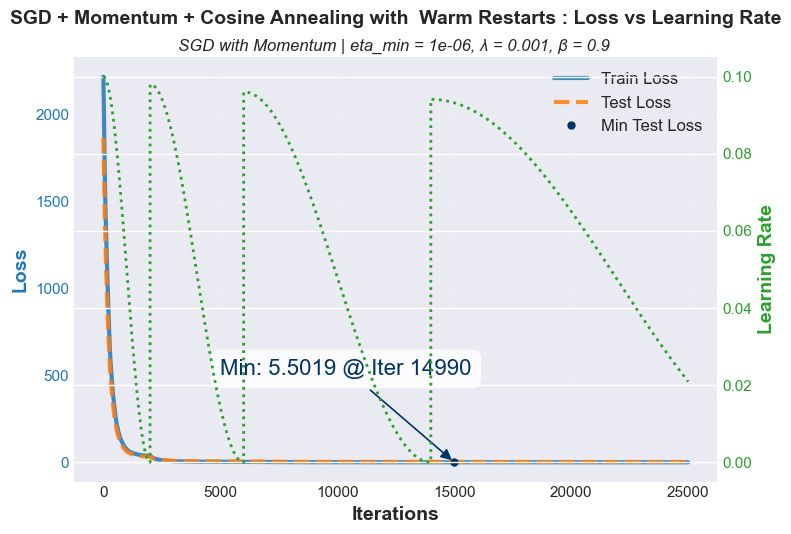

In [ ]:
# 設定圖表樣式
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax1 = plt.subplots(figsize = (8, 5.5))
fig.text(0.5, 0.893, f'SGD with Momentum | eta_min = {eta_min}, λ = {lambda_reg}, β = {beta}', ha = 'center', fontsize = 12, style = 'italic')

# 主軸
color1 = '#1f77bc'
color2 = '#ff7f0e'
color3 = '#003366'
ax1.set_xlabel('Iterations', fontsize = 14, fontweight = 'bold')
ax1.set_ylabel('Loss', color = color1, fontsize = 14, fontweight = 'bold')
ax1.plot(loss_history_train_ex1_33, label = 'Train Loss', color = color1, linewidth = 3, alpha = 0.85, zorder = 3)
ax1.plot(loss_history_test_ex1_33, label = 'Test Loss', color = color2, linewidth = 3, linestyle = 'dashed', alpha = 0.85, zorder = 3)
ax1.tick_params(axis = 'y', labelcolor = color1)
ax1.plot(min_index, min_test_loss, 'o', markersize = 5, label = 'Min Test Loss', color = color3, zorder = 4)
bbox_props = dict(boxstyle = 'round,pad = 0.4', fc = 'white', lw = 0.8, alpha = 0.85)
ax1.annotate(f'Min: {min_test_loss:.4f} @ Iter {min_index}', xy = (min_index, min_test_loss), xytext = (min_index - 10000, min_test_loss + 500), textcoords = 'data', arrowprops = dict(arrowstyle = '-|>', color = color3, lw = 1.2, zorder = 4), fontsize = 16, color = color3, bbox = bbox_props, zorder = 4)
ax1.legend(loc = 'upper right', fontsize = 12, framealpha = 0.9)
ax1.set_title('SGD + Momentum + Cosine Annealing with  Warm Restarts : Loss vs Learning Rate', fontsize = 14, fontweight = 'bold', pad = 24)
ax1.grid(True, linestyle = 'dashed', linewidth = 0.5, alpha = 0.4, zorder = 0)

# 副軸
color4 = '#2ca02c'
ax2 = ax1.twinx()
ax2.set_ylabel('Learning Rate', color = color4, fontsize = 14, fontweight = 'bold')
ax2.plot(lr_history, label = 'Learning Rate', color = color4, linestyle = 'dotted', linewidth = 2, zorder = 1)
ax2.tick_params(axis = 'y', labelcolor = color4)

# 自動調整佈局
fig.tight_layout()
#fig.savefig('ex1_35.png', dpi = 720, bbox_inches = 'tight')
fig.show()

iterations 0 : w = [0.3938 0.9774 0.7303], b = 0.6123, Train_Loss = 2161.6410, Test_Loss = 1824.9561
iterations 50 : w = [2.0462 2.299  0.8613], b = 4.1264, Train_Loss = 1786.8411, Test_Loss = 1495.8903
iterations 100 : w = [3.8273 3.4447 1.3969], b = 7.6763, Train_Loss = 1456.9961, Test_Loss = 1202.0281
iterations 150 : w = [5.166  4.3688 0.9814], b = 10.9333, Train_Loss = 1184.9966, Test_Loss = 974.1689
iterations 200 : w = [5.793  4.6053 0.7551], b = 13.7666, Train_Loss = 993.4028, Test_Loss = 810.5025
iterations 250 : w = [6.6492 5.4428 0.096 ], b = 16.2601, Train_Loss = 819.6434, Test_Loss = 669.5761
iterations 300 : w = [ 7.2216  5.8662 -0.4639], b = 18.3759, Train_Loss = 691.6861, Test_Loss = 565.3222
iterations 350 : w = [ 7.6057  6.166  -1.0171], b = 20.1410, Train_Loss = 594.3806, Test_Loss = 486.6148
iterations 400 : w = [ 7.8699  6.2104 -1.361 ], b = 21.5821, Train_Loss = 523.9980, Test_Loss = 428.5729
iterations 450 : w = [ 8.2312  6.542  -1.7544], b = 22.7857, Train_Loss 

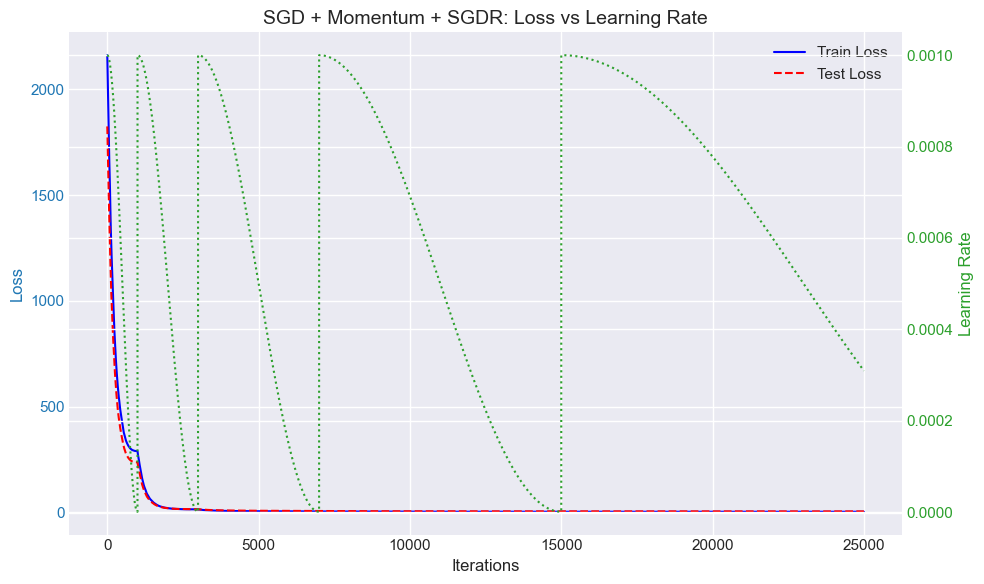

In [ ]:
import math
np.random.seed(42)

w = np.random.rand(3)
b = np.random.rand()

initial_lr = 0.001
iterations = 25000
decay_rate = 0.0001
lambda_reg = 0.001
beta = 0.9

# Cosine Annealing
# Cosine Annealing with Warm Restarts (SGDR)
eta_max = 0.001
eta_min = 1e-6
T_0 = 1000       # (初始週期長度 / SGDR)
T_i = T_0        # (當前週期長度 / SGDR)
T_start = 0      # (當前週期開始的 iteration / SGDR)

# Step Decay
drop_rate = 0.7
step_size = 1000

# Polynomial Decay
power = 1

v_w = np.zeros_like(w)
v_b = 0

loss_history_train7 = []
loss_history_test7 = []

lr_history = []

for i in range(iterations):
    idx = np.random.randint(0, X_train_standardized.shape[0])
    X_i = X_train_standardized[idx]
    y_i = y_train[idx]

    y_pred_i = np.dot(X_i, w) + b
    error_i = y_i - y_pred_i

    w_gradient = (-2) * X_i * error_i + 2 * lambda_reg * w
    b_gradient = (-2) * error_i

    # Decay 方法
    # learning_rate = initial_lr * (1 - i/iterations) ** power   # Polynomial Decay (多項式學習率衰退)
    # 當 power = 1 , 線性衰退(Linear Decay)
    # 當 power = 2 , 學習率會更快降低，尾端更平滑
    # 當 power < 1 ( 如 0.5 ) , 學習率初期下降慢、後期才加速下降

    # learning_rate = initial_lr / (1 + decay_rate * i)  # Inverse Time Decay
    # learning_rate = initial_lr * math.exp(-decay_rate * i)  # Exponential Decay
    # learning_rate = eta_min + 0.5 * (eta_max - eta_min) * (1 + math.cos(math.pi * i / iterations))      # Cosine Annealing 學習率公式
    # SGDR 更新週期 : 每當到達週期末時，就重設週期並倍增週期長度
    if i - T_start >= T_i:
        T_start = i
        T_i *= 2             # 每次週期倍增
    
    T_cur = i - T_start      # 當前週期中的相對位置
    learning_rate = eta_min + 0.5 * (eta_max - eta_min) * (1 + math.cos(math.pi * T_cur / T_i))

    # learning_rate = initial_lr * (drop_rate ** (i // step_size))    # Step Decay

    lr_history.append(learning_rate)

    v_w = beta * v_w + (1 - beta) * w_gradient
    v_b = beta * v_b + (1 - beta) * b_gradient

    w -= learning_rate * v_w
    b -= learning_rate * v_b

    y_pred_train = np.dot(X_train_standardized, w) + b
    error_train = y_train - y_pred_train

    loss_train = np.mean(error_train ** 2) + lambda_reg * np.sum(w ** 2)
    loss_history_train7.append(loss_train)

    y_pred_test = np.dot(X_test_standardized, w) + b
    error_test = y_test - y_pred_test
    loss_test = np.mean(error_test ** 2)
    loss_history_test7.append(loss_test)

    if i % 50 == 0 or i == (iterations - 1):
        print(f'iterations {i} : w = {np.round(w, 4)}, b = {b:.4f}, Train_Loss = {loss_train:.4f}, Test_Loss = {loss_test:.4f}')

fig, ax1 = plt.subplots(figsize = (10, 6))

# 主軸 : 畫 Loss 曲線
color = 'tab:blue'
ax1.set_xlabel('Iterations', fontsize = 12)
ax1.set_ylabel('Loss', color = color , fontsize = 12)
ax1.plot(loss_history_train7, label = 'Train Loss', color = 'blue')
ax1.plot(loss_history_test7, label = 'Test Loss', color = 'red', linestyle = 'dashed')
ax1.tick_params(axis = 'y', labelcolor = color)
ax1.legend(loc = 'upper right')
ax1.set_title('SGD + Momentum + SGDR: Loss vs Learning Rate', fontsize = 14)

# 副軸 : 畫 Learning Rate 曲線
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Learning Rate', color = color, fontsize = 12)
ax2.plot(lr_history, label = 'Learning Rate', color = color, linestyle = 'dotted')
ax2.tick_params(axis = 'y', labelcolor = color)

fig.tight_layout()
plt.grid(True)
plt.show()